<div class="alert alert-success" style="background-color: gray; color: white;">
    <center><h1>Text Mining Final Project</h1></center><br>
    <center>2023/2024</center>
</div>

### Group number  45 - Registration

|      |     Student Name     |     Student ID     | 
|---   |         ---          |           ---          |
|1|                Tomás Castilho           |        20230518            |
| 2    |          Catarina Ferreira |     20230533       | 
| 3    |     Beatriz Santos   |      20230521     | 
| 4    |     Francisco Campos  |    20230565        | 


# **Project Contents**
* [1. Installs and Imports](#installsandimports)
* [2. Data Exploration and Analysis](#dataexplorationandanalysis)
    *  [2.1 Index Fix](#indexfix)
    *  [2.2 Duplicates](#duplicates)
    *  [2.3 Null Values](#nullvalues)
    *  [2.4 Merge Datasets](#mergedatasets)
    *  [2.5 Houses with no reviews Issue](#houseswithnoreview)
    *  [2.6 Language Diversification](#languagediversification)
    *  [2.7 Visualizations](#visualizations)
* [3. Pre-Process](#preprocess)
    *  [3.1 Emoji Treatment](#emojitreatment)
    *  [3.2 Language Problem](#languageproblem)
        *  [3.2.1 Translating rows to English](#translating)
    *  [3.3 Cleaning Data](#cleaningdata)
    *  [3.4 Removing Unnecessary Data](#removingdata)
    *  [3.5 Re - Visualizations](#revisualizations)
    *  [3.6 Train / Validation Split](#traintestsplit)
* [4. Feature Engineering](#featureengineering)   
    *  [4.1 Sentiment Analysis](#sentimentanalysis)
    *  [4.2. TF-IDF](#tfidf)
    *  [4.3. Bag Of Words](#bow)
    *  [4.4. Word Embeddings](#wordembeddings)
        *  [4.4.1. Glove](#glove)
        *  [4.4.2. Word2Vec](#word2vec)
        *  [4.4.3. FastText](#fasttext)
        *  [4.4.1. Glove](#glove)
    *  [4.5. BERT sentence embeddings](#bert)    
* [5. Modelling](#modelling)
    *  [5.1 KNN](#knn)
    *  [5.2 Logistic Regression](#logreg)
    *  [5.3 Naive Bayes](#nb)
    *  [5.4 Advanced Modelling: Transformers](#transformers)
    *  [5.5 Model Selection and Hyperparameter Tuning](#modelselection)
* [6. Predicting Test Set](#testset)
     </li>
</ul>


## 1.Installs and Imports</font><div id="installsandimports"></div>

In [1]:
#pip install pandas
#!pip install langdetect
#!pip install matplotlib
#!pip install seaborn
#!pip install re
#!pip install openpyxl
#!pip install googletrans==4.0.0-rc1
#!pip install tqdm
#!pip install wordcloud
#!pip install nltk
#!pip install google-cloud-translate
#!pip install emoji
#!pip install konlpy
#!pip install spacy
#!pip install unicode
#!pip install scikit-learn
#!pip install textblob
#!pip install gensim
#!pip install scipy==1.12.0
#!pip install torch
#!pip install transformers
#!pip install sentence-transformers
#!pip install pandoc 

In [2]:
#Spacy Installs
#!python -m spacy download en_core_web_sm
#!python -m spacy download fr_core_news_sm
#!python -m spacy download pt_core_news_sm
#!python -m spacy download es_core_news_sm
#!python -m spacy download de_core_news_sm
#!python -m spacy download it_core_news_sm
#!python -m spacy download nl_core_news_sm
#!python -m spacy download sv_core_news_sm
#!python -m spacy download fi_core_news_sm
#!python -m spacy download da_core_news_sm
#!python -m spacy download ro_core_news_sm
#!python -m spacy download nb_core_news_sm

In [3]:
# Install NLTK if not already installed
try:
    import nltk
except ImportError:
    import os
    os.system('pip install nltk')
    import nltk

# Download the stopwords dataset
nltk.download('stopwords')

nltk.download('wordnet')

# Import the stopwords from NLTK
from nltk.corpus import stopwords

# Define stopwords for all languages
stopwords_dict = {
    'en': set(stopwords.words('english')),
    'fr': set(stopwords.words('french')),
    'de': set(stopwords.words('german')),
    'es': set(stopwords.words('spanish')),
    'pt': set(stopwords.words('portuguese')),
    'it': set(stopwords.words('italian')),
    'nl': set(stopwords.words('dutch')),
    'sv': set(stopwords.words('swedish')),
    'fi': set(stopwords.words('finnish')),
    'da': set(stopwords.words('danish')),
    'ro': set(stopwords.words('romanian')),
    'no': set(stopwords.words('norwegian'))
}

# Verify that the stopwords have been loaded
for lang, words in stopwords_dict.items():
    print(f"Stopwords for {lang}: {list(words)[:10]}...")  # Print first 10 stopwords for each language


Stopwords for en: ["she's", 'aren', 'themselves', "haven't", "won't", 'now', 'at', 'here', 'yourself', 'our']...
Stopwords for fr: ['aurons', 'avons', 'étant', 'la', 'au', 'ne', 'soit', 'me', 'serais', 'seras']...
Stopwords for de: ['keinen', 'würden', 'solchen', 'deinen', 'deiner', 'bis', 'werden', 'zum', 'denselben', 'sehr']...
Stopwords for es: ['hayáis', 'unos', 'ella', 'será', 'nuestra', 'quien', 'eso', 'e', 'me', 'seríamos']...
Stopwords for pt: ['aquelas', 'será', 'somos', 'teríamos', 'suas', 'pelo', 'houvessem', 'teve', 'haja', 'haver']...
Stopwords for it: ['stai', 'dei', 'era', 'faceste', 'facesse', 'stanno', 'stavi', 'farete', 'siano', 'la']...
Stopwords for nl: ['iemand', 'iets', 'ja', 'bij', 'tot', 'hier', 'me', 'uit', 'de', 'ik']...
Stopwords for sv: ['än', 'då', 'mycket', 'jag', 'dessa', 'hon', 'varje', 'dem', 'sin', 'vid']...
Stopwords for fi: ['niillä', 'heitä', 'minulta', 'miltä', 'ja', 'vaikka', 'olla', 'niitä', 'mitkä', 'tänä']...
Stopwords for da: ['skal', 'mod', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TCastilho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\TCastilho\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [44]:
# Standard library imports
import re
import string
import unicodedata
from collections import Counter

# Data manipulation and visualization imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Text processing imports
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from langdetect import detect
#from googletrans import Translator
from google.cloud import translate
import spacy
from spacy.cli import download
from tqdm import tqdm
import emoji
from wordcloud import WordCloud, STOPWORDS

# Machine learning and natural language processing imports
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim.downloader as api

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB

import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW

from sklearn.metrics import f1_score, recall_score, precision_score

# Import necessary libraries for GridSearchCV
from sklearn.model_selection import GridSearchCV

import warnings

from sentence_transformers import SentenceTransformer

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

## 2.Data Exploration and Analysis</font><div id="dataexplorationandanalysis"></div>

In the data exploration and analysis phase, we conducted a thorough examination of our dataset to identify and rectify any issues that could impact our model's performance. We started with an **Index Fix**, ensuring that all data entries were properly indexed for seamless processing. This was followed by identifying and removing **Duplicates** to maintain the integrity of the dataset.

Next, we addressed **Null Values** by either imputing missing data or removing incomplete records, depending on the context. We then proceeded to **Merge Datasets**, combining multiple sources of data to create a comprehensive and unified dataset. 

A significant issue we encountered was the presence of **Houses with no reviews**, which we analyzed and addressed to ensure our dataset was representative and unbiased. To handle the diversity of languages within our dataset, we performed **Language Diversification** to ensure all textual data was appropriately categorized and processed.

Finally, we created several **Visualizations** to gain insights into the data distribution, trends, and potential anomalies. These visualizations helped us better understand our dataset and guided our subsequent steps in the project.

Overall, this meticulous data exploration and analysis process ensured that we started with a clean, well-structured, and comprehensive dataset, setting a solid foundation for our feature engineering and modelling phases.


**Checking if data was loaded Correctly**

In [6]:
train = pd.read_excel("train.xlsx")
train_reviews = pd.read_excel("train_reviews.xlsx")
test = pd.read_excel("test.xlsx")
test_reviews = pd.read_excel("test_reviews.xlsx")

In [7]:
train.head(5)

,index,description,host_about,unlisted
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0


In [8]:
train_reviews.head(5)

,index,comments
0,1,this is a very cozy and comfortable house to s...
1,1,good<br/>
2,1,"My first hostel experience, and all I have to ..."
3,1,Das Hostel war neu und deshalb funktionierte a...
4,1,"It was fine for a dorm, but I think for the pe..."


In [9]:
test.head(5)

,index,description,host_about
0,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de..."
1,2,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...
2,3,"Bright, beautiful, and spacious. This four-bed...","Hi there!\n\nWe're GuestReady, a professional ..."
3,4,Charming Apartment Close to the Bay of Cascais...,:)
4,5,"Se procura umas férias perto da praia, casino ...",Bem vindos a Portugal!_x000D_\nAdoro o meu Paí...


In [10]:
test_reviews.head(5)

,index,comments
0,1,Thank you very much Antonio ! All has been per...
1,1,Very nice appartment in the old town of Lissab...
2,1,When travelling we're looking for kids friendl...
3,1,We've been in Lisbon in march 2013 (3 adults a...
4,1,Our host Antonio was very helpful with informa...


**Everything looks fine**

In [11]:
print("train shape:", train.shape)
print("train_reviews shape:", train_reviews.shape)
print("test shape:", test.shape)
print("test_reviews shape:", test_reviews.shape)

train shape: (6248, 4)
train_reviews shape: (361281, 2)
test shape: (695, 3)
test_reviews shape: (41866, 2)


### 2.1 Index Fix</font><div id="indexfix"></div>

**In the dataset, the index column has repeating values, which likely indicate that each value corresponds to a specific house. To enhance clarity, we will rename this column to 'house ID'.**

In [12]:
train.rename(columns={'index': 'houseID'}, inplace=True)
train_reviews.rename(columns={'index': 'houseID'}, inplace=True)
test.rename(columns={'index': 'houseID'}, inplace=True)
test_reviews.rename(columns={'index': 'houseID'}, inplace=True)


In [13]:
train.head(5)

,houseID,description,host_about,unlisted
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0


In [14]:
train_reviews.head(5)

,houseID,comments
0,1,this is a very cozy and comfortable house to s...
1,1,good<br/>
2,1,"My first hostel experience, and all I have to ..."
3,1,Das Hostel war neu und deshalb funktionierte a...
4,1,"It was fine for a dorm, but I think for the pe..."


In [15]:
test.head(5)

,houseID,description,host_about
0,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de..."
1,2,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...
2,3,"Bright, beautiful, and spacious. This four-bed...","Hi there!\n\nWe're GuestReady, a professional ..."
3,4,Charming Apartment Close to the Bay of Cascais...,:)
4,5,"Se procura umas férias perto da praia, casino ...",Bem vindos a Portugal!_x000D_\nAdoro o meu Paí...


In [16]:
test_reviews.head(5)

,houseID,comments
0,1,Thank you very much Antonio ! All has been per...
1,1,Very nice appartment in the old town of Lissab...
2,1,When travelling we're looking for kids friendl...
3,1,We've been in Lisbon in march 2013 (3 adults a...
4,1,Our host Antonio was very helpful with informa...


### 2.2 Duplicates</font><div id="duplicates"></div>

**Checking for Duplicated Rows**

In [17]:
print("Number of duplicated rows in train DataFrame:", train.duplicated().sum())
print("Number of duplicated rows in train_reviews DataFrame:", train_reviews.duplicated().sum())
print("Number of duplicated rows in test DataFrame:", test.duplicated().sum())
print("Number of duplicated rows in test_reviews DataFrame:", test_reviews.duplicated().sum())

Number of duplicated rows in train DataFrame: 0
Number of duplicated rows in train_reviews DataFrame: 142
Number of duplicated rows in test DataFrame: 0
Number of duplicated rows in test_reviews DataFrame: 15


**Removing Duplicated Rows**

In [18]:
train.drop_duplicates(inplace=True)
train_reviews.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)
test_reviews.drop_duplicates(inplace=True)

print("Number of duplicated rows in train DataFrame after removal:", train.duplicated().sum())
print("Number of duplicated rows in train_reviews DataFrame after removal:", train_reviews.duplicated().sum())
print("Number of duplicated rows in test DataFrame after removal:", test.duplicated().sum())
print("Number of duplicated rows in test_reviews DataFrame after removal:", test_reviews.duplicated().sum())


Number of duplicated rows in train DataFrame after removal: 0
Number of duplicated rows in train_reviews DataFrame after removal: 0
Number of duplicated rows in test DataFrame after removal: 0
Number of duplicated rows in test_reviews DataFrame after removal: 0


### 2.3 Null Values</font><div id="nullvalues"></div>

In [19]:
print("Number of null values in train DataFrame:")
print(train.isnull().sum())

print("\nNumber of null values in train_reviews DataFrame:")
print(train_reviews.isnull().sum())

print("\nNumber of null values in test DataFrame:")
print(test.isnull().sum())

print("\nNumber of null values in test_reviews DataFrame:")
print(test_reviews.isnull().sum())

Number of null values in train DataFrame:
houseID        0
description    0
host_about     0
unlisted       0
dtype: int64

Number of null values in train_reviews DataFrame:
houseID     0
comments    2
dtype: int64

Number of null values in test DataFrame:
houseID        0
description    0
host_about     0
dtype: int64

Number of null values in test_reviews DataFrame:
houseID     0
comments    0
dtype: int64


In [20]:
train_reviews[train_reviews['comments'].isnull()]

,houseID,comments
97996,1654,NaN
334443,5789,NaN


In [21]:
train_reviews.dropna(subset=['comments'], inplace=True)
train_reviews[train_reviews['comments'].isnull()]

,houseID,comments


In [22]:
train_reviews[train_reviews['comments'].str.len() <= 1]


,houseID,comments
275,9,.
317,11,I
432,11,👍
682,16,.
698,16,q
...,...,...
359004,6202,👏
359217,6209,👌
359303,6216,.
359456,6221,1


**Some rows dont really have text, we will drop them later**

In [23]:
train_original = train.copy()
train_reviews_original = train_reviews.copy()
test_original = test.copy()
test_reviews_original = test_reviews.copy()

In [24]:
print("train shape:", train_original.shape)
print("train_reviews shape:", train_reviews_original.shape)
print("test shape:", test_original.shape)
print("test_reviews shape:", test_reviews_original.shape)

train shape: (6248, 4)
train_reviews shape: (361137, 2)
test shape: (695, 3)
test_reviews shape: (41851, 2)


### 2.4 Merge Datasets</font><div id="mergedatasets"></div>

In [25]:
train_merged = train.merge(train_reviews, on='houseID', how='left')
train_merged.index.name = 'reviewID'
test_merged = test.merge(test_reviews, on='houseID', how='left')
test_merged.index.name = 'reviewID'

In [26]:
train_merged.head(5)

,houseID,description,host_about,unlisted,comments
reviewID,,,,,
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,this is a very cozy and comfortable house to s...
1,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,good<br/>
2,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,"My first hostel experience, and all I have to ..."
3,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,Das Hostel war neu und deshalb funktionierte a...
4,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,"It was fine for a dorm, but I think for the pe..."


In [27]:
test_merged.head(5)

,houseID,description,host_about,comments
reviewID,,,,
0,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",Thank you very much Antonio ! All has been per...
1,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",Very nice appartment in the old town of Lissab...
2,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",When travelling we're looking for kids friendl...
3,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",We've been in Lisbon in march 2013 (3 adults a...
4,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",Our host Antonio was very helpful with informa...


In [28]:
print("train shape:", train_merged.shape)
print("test shape:", test_merged.shape)

train shape: (363140, 5)
test shape: (42071, 4)


In [29]:
number_of_original_houseIDs = train_merged['houseID'].nunique()
print("Number of original houseIDs:", number_of_original_houseIDs)

Number of original houseIDs: 6248


### 2.5 Houses with no review Issue</font><div id="houseswithnoreview"></div>

There are houses without reviews, which might be crucial for predicting whether they are listed or unlisted. Therefore, we will fill the missing reviews for these houses with "no_comment." This situation occurs because, after merging the datasets, some houseIDs from the training dataset are not present in train_reviews.

In [30]:
train_merged['comments'] = train_merged['comments'].fillna('#nocomment')
test_merged['comments'] = test_merged['comments'].fillna('#nocomment')

In [31]:
# Filter properties with and without reviews
properties_with_reviews = train_merged[train_merged['comments'] != '#nocomment']
properties_without_reviews = train_merged[train_merged['comments'] == '#nocomment']

# Calculate the total number of reviews
total_reviews = len(properties_with_reviews)

# Calculate the total number of properties
total_properties = number_of_original_houseIDs

# Calculate the average reviews per property
average_reviews_per_property = total_reviews / total_properties

# Print the number of properties with reviews and the number of reviews
num_properties_with_reviews = properties_with_reviews['houseID'].nunique()
num_reviews = len(properties_with_reviews)
print("Number of reviews:", num_reviews)
print("Number of properties with reviews:", num_properties_with_reviews)


# Print the number of properties without reviews
num_properties_without_reviews = properties_without_reviews['houseID'].nunique()
print("Number of properties without reviews:", num_properties_without_reviews)

# Print the average reviews per property
print("Average reviews per property:", average_reviews_per_property)


Number of reviews: 361137
Number of properties with reviews: 4245
Number of properties without reviews: 2003
Average reviews per property: 57.800416133162614


### 2.6 Language Diversification</font><div id="languagediversification"></div>

**We realised that not all the reviews were on the same language, so we decided to identify which language it was in**

In [32]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return "Unknown"
detect_language('#nocomment')

'it'

If we were going drop French reviews, we would need to make some adjustments to avoid dropping rows with no comments, however this will not be necessary.

In [33]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return "Unknown"

In [34]:
# Initialize tqdm with the total number of rows
total_rows = len(train_merged)
with tqdm(total=total_rows) as pbar:
    # Apply detect_language with progress bar to each row in description column
    def apply_and_track_progress(row):
        pbar.update(1)
        return detect_language(row)

    train_merged["language_reviews"] = train_merged["comments"].apply(apply_and_track_progress)
    test_merged["language_reviews"] = test_merged["comments"].apply(apply_and_track_progress)

405211it [28:58, 233.10it/s]                                                                                           


In [35]:
# Initialize tqdm with the total number of rows
total_rows = len(train_merged)
with tqdm(total=total_rows) as pbar:
    # Apply detect_language with progress bar to each row in description column
    def apply_and_track_progress(row):
        pbar.update(1)
        return detect_language(row)

    train_merged["language_description"] = train_merged["description"].apply(apply_and_track_progress)
    test_merged["language_description"] = test_merged["description"].apply(apply_and_track_progress)

405211it [37:39, 179.34it/s]                                                                                           


### 2.7 Visualizations</font><div id="vizualizations"></div>

**Languages Codes**

'en': English 'pt': Portuguese 'fr': French 'es': Spanish 'de': German 'da': Danish 'no': Norwegian 'sv': Swedish 'it': Italian 'ca': Catalan 'zh-cn': Chinese (Simplified) 'nl': Dutch

**Languages Counts Reviews**

C:\Users\TCastilho\AppData\Local\Temp\ipykernel_16188\179341475.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")


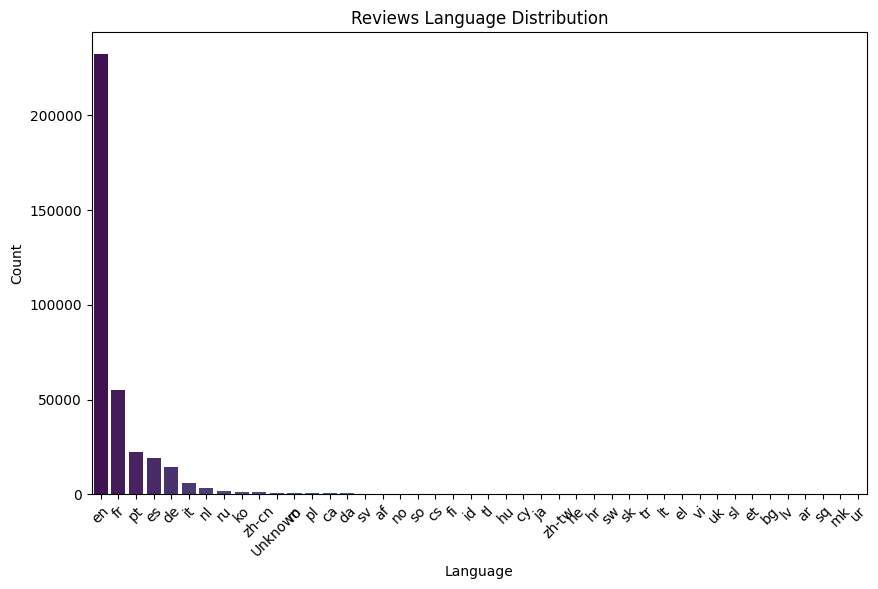

In [36]:
language_counts = train_merged["language_reviews"].value_counts()

# Sort the language counts
language_counts = language_counts.sort_values(ascending=False)

# Plot the sorted language counts
plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")
plt.title("Reviews Language Distribution")
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [37]:
train_merged["language_reviews"].unique()

array(['en', 'cy', 'de', 'fr', 'es', 'pt', 'ru', 'it', 'nl', 'ko',
       'zh-cn', 'he', 'Unknown', 'id', 'pl', 'no', 'so', 'da', 'sq', 'ro',
       'ca', 'hr', 'ja', 'zh-tw', 'tl', 'cs', 'ar', 'af', 'sk', 'sv',
       'lv', 'hu', 'el', 'sl', 'fi', 'et', 'sw', 'vi', 'uk', 'lt', 'tr',
       'mk', 'bg', 'ur'], dtype=object)

**Languages Counts Description**

C:\Users\TCastilho\AppData\Local\Temp\ipykernel_16188\1052306786.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")


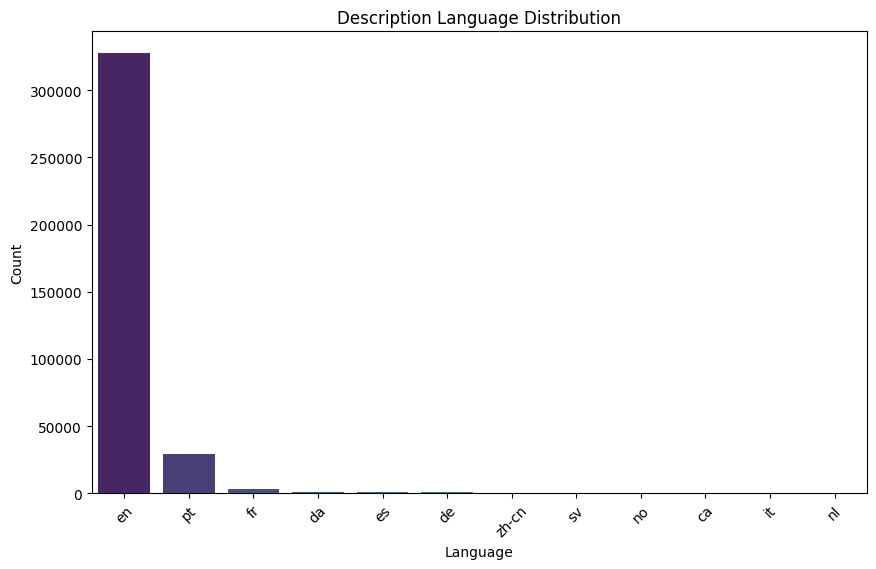

In [38]:
language_counts = train_merged["language_description"].value_counts()

# Sort the language counts
language_counts = language_counts.sort_values(ascending=False)

# Plot the sorted language counts
plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")
plt.title("Description Language Distribution")
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [39]:
train_merged["language_description"].unique()

array(['en', 'pt', 'fr', 'es', 'de', 'da', 'no', 'sv', 'it', 'ca',
       'zh-cn', 'nl'], dtype=object)

**Listed vs Unlisted**

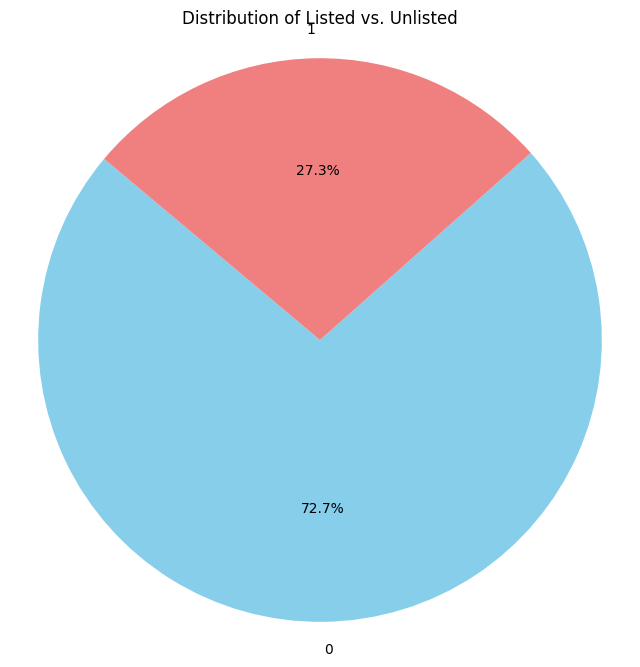

In [40]:
unlisted_counts = train['unlisted'].value_counts()

# Plotting the pie chart for the 'unlisted' column
plt.figure(figsize=(8, 8))
plt.pie(unlisted_counts, labels=unlisted_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Listed vs. Unlisted')
plt.axis('equal')
plt.show()

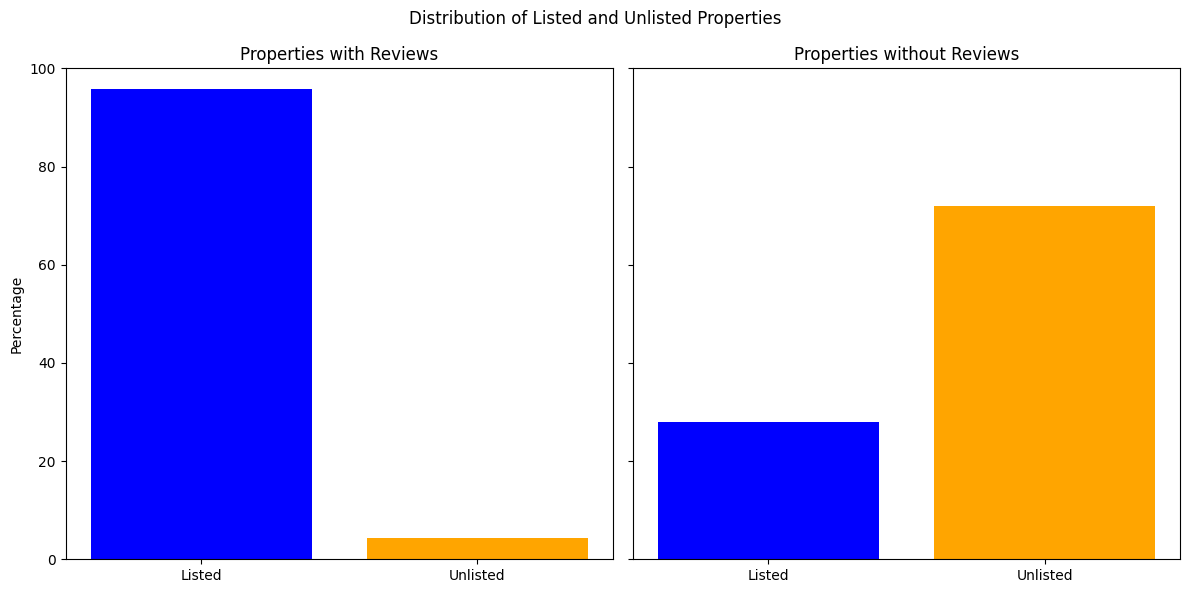

In [41]:
# Calculate the distribution of 'unlisted' for properties with reviews
with_reviews_indices = set(train_reviews['houseID'])
unlisted_with_reviews = train_merged[train_merged['houseID'].isin(with_reviews_indices)]['unlisted'].value_counts(normalize=True) * 100

# Calculate the distribution of 'unlisted' for properties without reviews
unlisted_without_reviews = train_merged[~train_merged['houseID'].isin(with_reviews_indices)]['unlisted'].value_counts(normalize=True) * 100

labels = ['Listed', 'Unlisted']
with_reviews = [unlisted_with_reviews.get(0, 0), unlisted_with_reviews.get(1, 0)]
without_reviews = [unlisted_without_reviews.get(0, 0), unlisted_without_reviews.get(1, 0)]

x = range(len(labels))

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot for properties with reviews
ax[0].bar(x, with_reviews, color=['blue', 'orange'])
ax[0].set_title('Properties with Reviews')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
ax[0].set_ylabel('Percentage')
ax[0].set_ylim(0, 100)

# Plot for properties without reviews
ax[1].bar(x, without_reviews, color=['blue', 'orange'])
ax[1].set_title('Properties without Reviews')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].set_ylim(0, 100)

# Add overall title
fig.suptitle('Distribution of Listed and Unlisted Properties')

# Show the plot
plt.tight_layout()
plt.show()

**Word count**

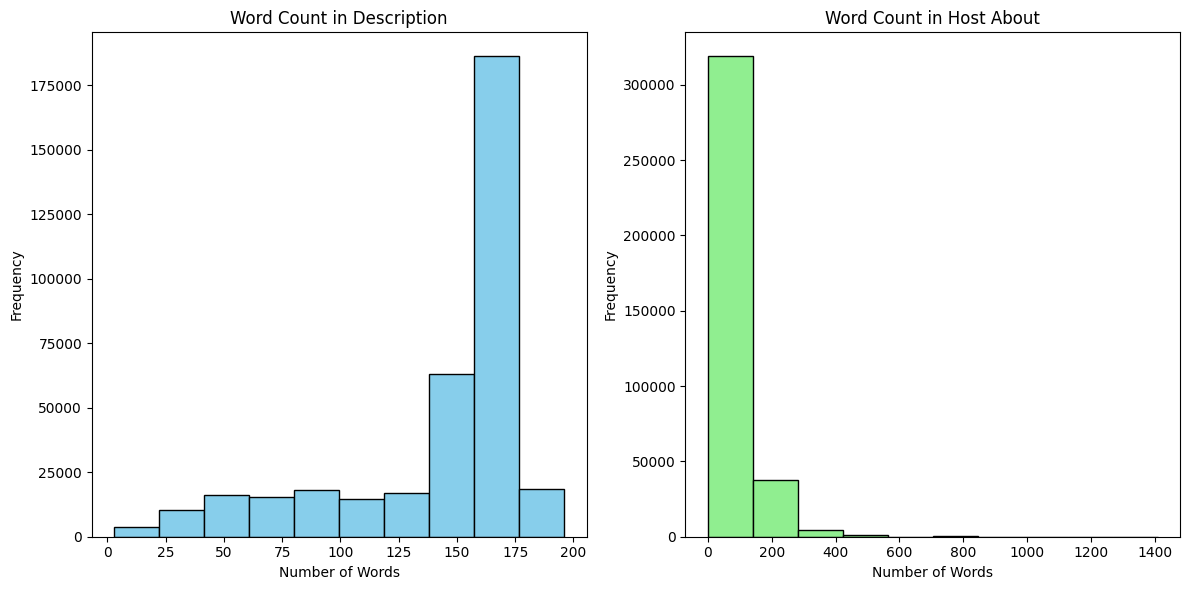

In [42]:
def count_words(text):
    if isinstance(text, str):
        return len(text.split())
    else:
        return np.nan  # or any other appropriate value for missing data

# Apply word count function to each column
train_merged['description_word_count'] = train_merged['description'].apply(count_words)
train_merged['host_about_word_count'] = train_merged['host_about'].apply(count_words)

# Plot histograms
plt.figure(figsize=(12, 6))

# Histogram for description word count
plt.subplot(1, 2, 1)
plt.hist(train_merged['description_word_count'], bins=10, color='skyblue', edgecolor='black')
plt.title('Word Count in Description')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

# Histogram for host_about word count
plt.subplot(1, 2, 2)
plt.hist(train_merged['host_about_word_count'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Word Count in Host About')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Word Frequencies**

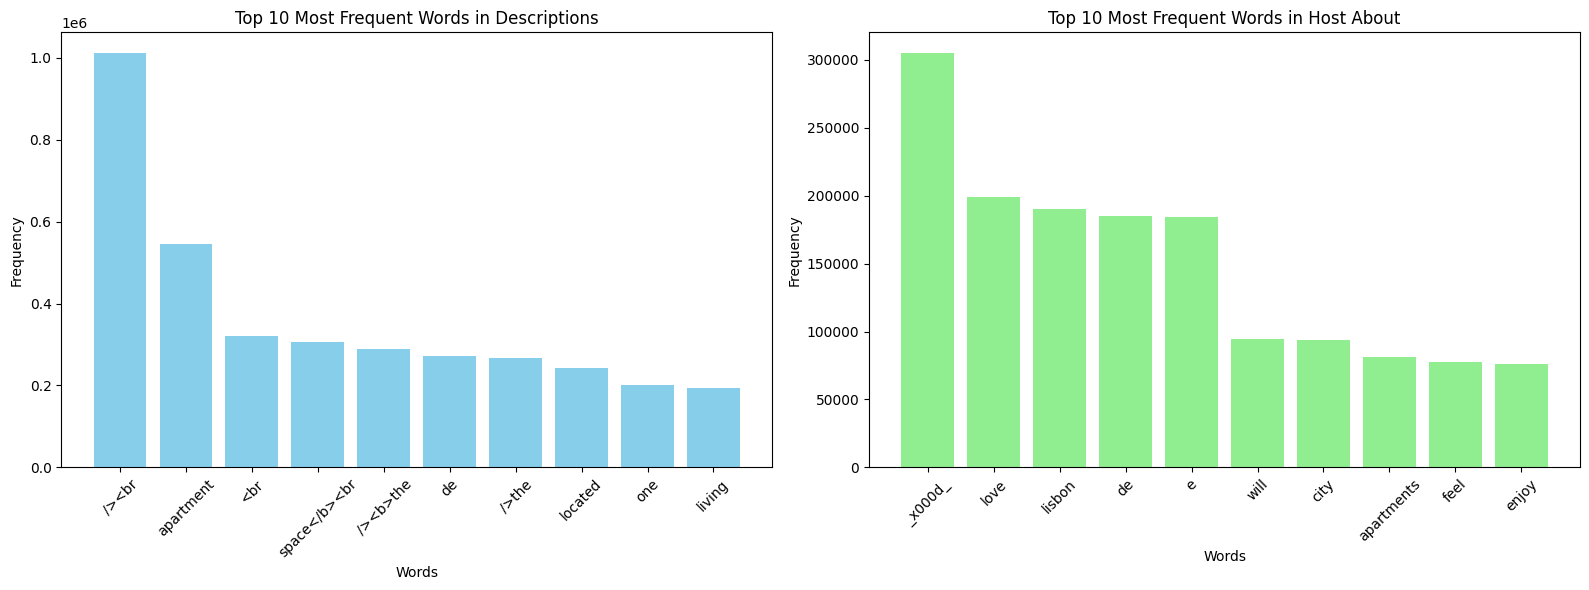

In [45]:
def count_word_frequencies(text_column, num_words=10):
    # Convert non-string values to strings
    text_column = [str(item) for item in text_column]

    # Join all text from the specified column into a single string
    all_text = ' '.join(text_column)

    # Convert text to lowercase and split into words
    words = all_text.lower().split()

    # Filter out common stop words (assuming STOPWORDS is defined somewhere)
    words = [word for word in words if word not in STOPWORDS]

    # Count word frequencies
    word_counts = Counter(words)

    # Get the most common words and their frequencies
    top_words = word_counts.most_common(num_words)

    return dict(top_words)

# Count word frequencies from the 'description' and 'host_about' columns
top_words_description = count_word_frequencies(train_merged['description'])
top_words_host_about = count_word_frequencies(train_merged['host_about'])

# Plotting the histograms of most frequent words for both columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for 'description' column
axes[0].bar(top_words_description.keys(), top_words_description.values(), color='skyblue')
axes[0].set_title('Top 10 Most Frequent Words in Descriptions')
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Plot for 'host_about' column
axes[1].bar(top_words_host_about.keys(), top_words_host_about.values(), color='lightgreen')
axes[1].set_title('Top 10 Most Frequent Words in Host About')
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout and display plots
plt.tight_layout()
plt.show()


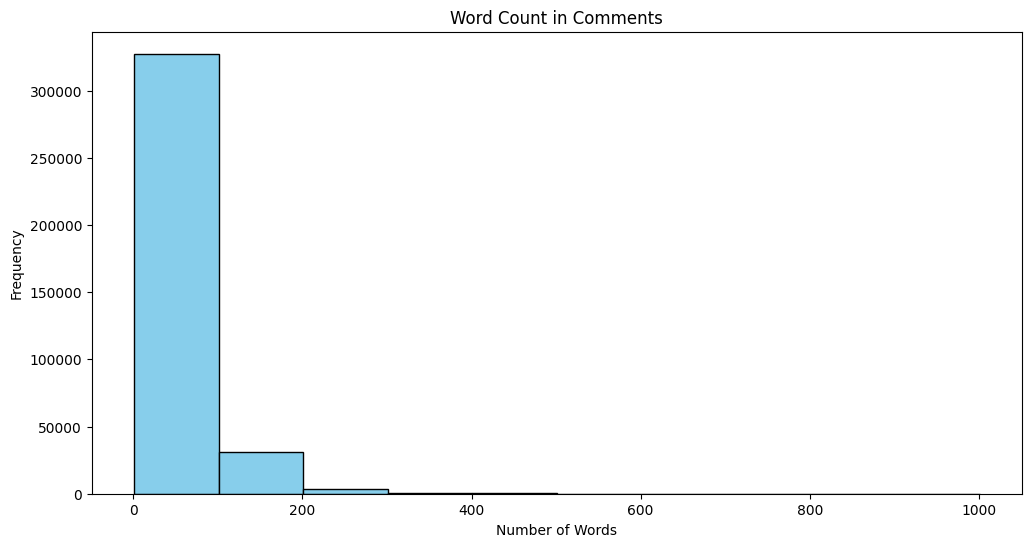

In [46]:
def count_words(text):
    # Convert text to string if it is not and handle NaN values
    if pd.isna(text):
        return 0
    return len(str(text).split())

# Apply word count function to the 'comments' column
word_counts = train_merged['comments'].apply(count_words)

# Plot histogram
plt.figure(figsize=(12, 6))
plt.hist(word_counts, bins=10, color='skyblue', edgecolor='black')
plt.title('Word Count in Comments')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

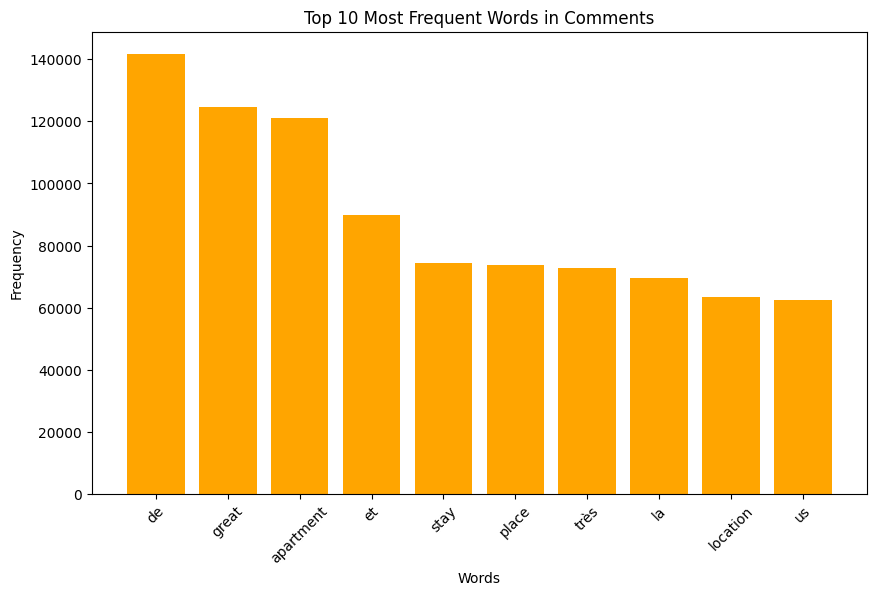

In [47]:
def count_word_frequencies(text_column, num_words=10):
    # Convert each comment to a string and concatenate them into a single text
    words = ' '.join(str(comment) for comment in text_column if pd.notna(comment)).lower().split()

    # Filter out common stop words
    words = [word for word in words if word not in STOPWORDS]

    # Count word frequencies
    word_counts = Counter(words)

    # Get the most common words and their frequencies
    top_words = word_counts.most_common(num_words)

    return dict(top_words)

# Count word frequencies from the 'comments' column
top_words_comments = count_word_frequencies(train_merged['comments'])

# Plotting the histogram of most frequent words in 'comments' column
plt.figure(figsize=(10, 6))
plt.bar(top_words_comments.keys(), top_words_comments.values(), color='orange')
plt.title('Top 10 Most Frequent Words in Comments')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

**Word Cloud**

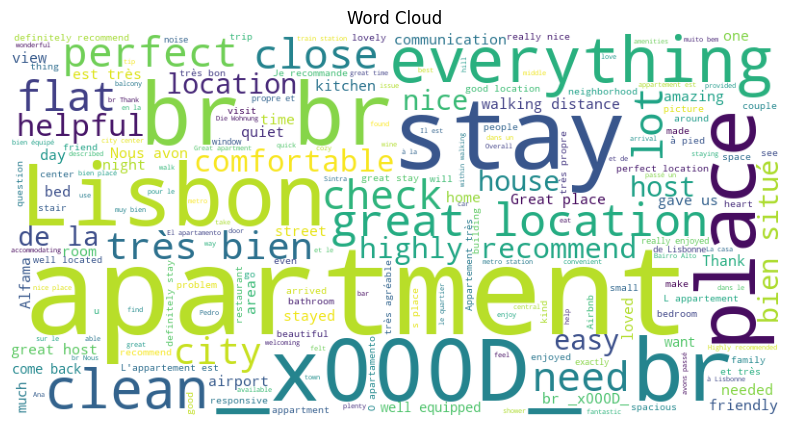

In [48]:
# Joining all the reviews into a single string
all_reviews = ' '.join(train_merged['comments'])

# Create WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_reviews)

# Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Word Cloud')
plt.show()


## 3. Pre-Process</font><div id="preprocess"></div>

In the pre-processing stage of our project, we meticulously prepared the data to ensure it was in an optimal state for feature engineering and modelling. This phase involved several critical steps. We began with **Emoji Treatment**, addressing and standardizing the use of emojis within the text data. Next, we tackled **Language Problems** by **Translating rows to English** for consistency, ensuring that all text data was in the same language.

We then moved on to **Cleaning Data**, which involved removing any irrelevant characters, correcting typos, and standardizing text formats. This was followed by **Removing Unnecessary Data**, where we eliminated any redundant or irrelevant information that could potentially skew our model’s performance. 

After these steps, we performed **Re-Visualizations** to understand the data better and identify any remaining issues that needed addressing. Finally, we conducted a **Train / Validation Split** to divide the data into training and validation sets, ensuring that we had a robust mechanism for evaluating our models’ performance.

Throughout this process, our aim was to create clean and consistent datasets that would enhance the accuracy and reliability of our subsequent feature engineering and modelling efforts.


### 3.1 Emoji Treatment</font><div id="emojitreatment"></div>

The demojize() function takes a string as input and returns the string with the Unicode characters replaced by their corresponding emoji names. For example, if you pass the string “😀” to the demojize() function, it will return the string “smiley face”. https://codeforgeek.com/python-emoji-module/ emoji for python By default, the language is English (language='en') but also supported languages are:

Spanish ('es')

Portuguese ('pt')

Italian ('it')

French ('fr')

German ('de')

Farsi/Persian ('fa')

Indonesian ('id')

Simplified Chinese ('zh')

Japanese ('ja')

Korean ('ko')

Russian ('ru')

Arabic ('ar')

Turkish ('tr')

In [49]:
# Function to check for emojis
def has_emojis(text):
    if pd.isnull(text):
        return False
    return emoji.emoji_count(str(text)) > 0

# Function to convert emojis to text
def convert_emojis_to_text(dataframe, column_text, column_language):
    dataframe_copy = dataframe.copy()

    def convert_text(text, language):
        if has_emojis(text):
            try:
                return emoji.demojize(text, language=language)
            except:
                return emoji.demojize(text, language='en')
        else:
            return text

    # Apply the conversion to each row
    dataframe_copy[column_text] = dataframe_copy.apply(
        lambda row: convert_text(row[column_text], row[column_language]), axis=1
    )

    return dataframe_copy

In [50]:
train_merged_demojized = convert_emojis_to_text(train_merged, 'comments', 'language_reviews')

In [51]:
train_merged_demojized = convert_emojis_to_text(train_merged_demojized, 'description', 'language_description')

In [52]:
test_merged_demojized = convert_emojis_to_text(test_merged, 'comments', 'language_reviews')

In [53]:
test_merged_demojized = convert_emojis_to_text(test_merged_demojized, 'description', 'language_description')

**Checking if there still are emojis**

In [54]:
def print_comments_with_emojis(dataframe, column_text):
    with_emojis = dataframe[dataframe[column_text].apply(has_emojis)]
    print("Comments with emojis after processing:")
    for index, row in with_emojis.iterrows():
        print(f"Index {index}: {row[column_text]}")

In [55]:
print_comments_with_emojis(train_merged_demojized, 'comments')

Comments with emojis after processing:
Index 437: 👍
Index 831: 👍
Index 1044: Wspaniałe miejsce! <br/><br/>Gospodarz, który nas obsługiwał był niezwykle uprzejmy i pomocny. Gdy potrzebowaliśmy pomocy w nocy od razu się z nami skontaktował i pomógł nam natychmiast. Mieszkanie jest nowe, czyste, schludne, a okolica urokliwa i autentyczna. Do Lizbony centralnej jest dosłownie 30 minut spacerem. Jeśli planujesz urlop w Lizbonie, koniecznie rozważ tę ofertę, bo odpoczniesz i poczujesz się zaopiekowany. <br/><br/>Dziękujemy jeszcze raz za gościnę! 🥰
Index 2384: Good👌
Index 3135: Amazing 10/10😇
Index 5307: ♥️
Index 6093: 💚
Index 6176: 👍
Index 7105: Bardzo komfortowe mieszkanie . Ładne pokoje , komfortowe łazienki . Zlokalizowane  w cichej okolicy , blisko sklepiki lokalne .<br/>Bezproblemowe zameldowanie.  Do  centrum  kilka kroków, kilka schodków i jesteś na placu Rossio i na placu Martim Monitz  z którego rusza  słynny tramwaj 28!! Niedaleko Elevador da Lavra który  pomoże  zmęczonym dostać 

In [56]:
print_comments_with_emojis(train_merged_demojized, 'description')

Comments with emojis after processing:
Index 176670: 这是位于葡萄牙里斯本辛特拉的独栋私人别墅，位于著名度假胜地辛特拉高尔夫酒店的正对面，拥有里斯本最大的球场，5分钟即可到达沙滩🏖️<br /><br /><b>License number</b><br />Exempt


We still have a very small percentage of emojis remaining after running the conversion function, it might be due to several factors such as unsupported emojis, non-standard emoji representations, or limitations in the emoji library. In our to prevent data leakage our decisions will be based on training data, and the test data is processed using the same rules established from the training data.

Based on the training set, we created a dictionary mapping emojis to their textual representations. Any emoji not found in the custom dictionary will be replaced with a generic placeholder :emoji:

textual representations can be found here: https://www.w3schools.com/charsets/ref_emoji_smileys.asp

https://www.geeksforgeeks.org/convert-emoji-into-text-in-python/

In [57]:
remaining_emoji_dict = {
    '💥': ':collision:',
    '🤭': ':face_with_hand_over_mouth:',
    '☺️': ':white_smiling_face:',
    '🤩': ':star-struck:',
    '💪🏽': ':flexed_biceps_dark_skin_tone:',
    '👍': ':thumbs_up:',
    '⭐': ':star:',
    '😊': ':smiling_face_with_smiling_eyes:',
    '👌': ':ok_hand:',
    '👌🏼': ':ok_hand::light_skin_tone:',
    '👍🏻': ':thumbs_up_light_skin_tone:',
    '👍🏽': ':thumbs_up_medium-dark_skin_tone:',
    '😘': ':face_blowing_a_kiss:',
    '🤗': ':hugging_face:',
    '😉': ':winking_face:',
    '🌟': ':glowing_star:',
    '🙂': ':slightly_smiling_face:',
    '😱': ':face_screaming_in_fear:',
    '😃': ':grinning_face_with_big_eyes:',
    '❤️': ':heart:',
    '🥰': ':smiling_face_with_hearts:',
    '😇':'smiling_face_with_halo:',
    '🤙🏼': ":call_me_hand_medium-light_skin_tone:",
    '🤙': ":call_me_hand:",
    '👏': ':clapping_hands:',
    '👏🏼': ':clapping_hands::light_skin_tone:',
    '💚': ':green_heart:',
    '🙂': ':slightly_smiling_face:',
    '🔝': ':top_arrow:',
    '👌🏽': ':ok_hand::medium_skin_tone:',
    '😁': ':beaming_face_with_smiling_eyes:',
    '😂': ':face_with_tears_of_joy:',
    '🇵🇹': ':flag_Portugal:',
    '😍': ':smiling_face_with_heart-eyes:',
    '✨': ':sparkles:',
    '🙏🏻': ':folded_hands::light_skin_tone:',
    '⭐': ':star:',
    '😏': ':smirking_face:',
    '😋': ':face_savoring_food:',
    '🐝': ':honeybee:',
    '😎': ':smiling_face_with_sunglasses:',
    '💯': ':hundred_points:',
    '🎇': ':sparkler:',
    '🖤': ':black_heart:',
    '😌': ':relieved_face:',
    '🐈': ':cat:',
    '🎈': ':balons:',
    '💕': ':two_hearts:',
    '🚀': ':rocket:',
    '🌞': ':sun_with_face:',
    '🍋': ':lemon:',
    '😜':':stuck_out_tongue_winking_eye:',
    '🪨': ':rock:',
    '✌️': ':victory_hand:',
    '🔑': ':key:',
    '😃': ':grinning_face_with_big_eyes:',
    '😀':':grinning_face:',
    '✔️':':check_mark:',
    '🉐':':Japanese_acceptable_button:',
    '🤪':':zany_face:',
    '😆': ':grinning_squinting_face:',
    '🌅': ':sunrise:',
    '🌸': ':cherry_blossom:',
    '🦫': ':beaver:',
    '🎷': ':saxophone:',
    '🔥':':fire:',
    '🐐':':goat:',
    '🤝':':handshake:',
    '☹️':':frowning_face:',
    '☀️':':sun:',
    '🌱': ':seedling:',
    '✅': ':white_heavy_check_mark:',
    '🌹': ':rose:',
    '🙈': ':see-no-evil_monkey:',
    '💗': ':growing_heart:',
    '🏖️': ':beach:',
    '👌🏾': ':ok_hand::medium-dark_skin_tone:',
    '♥️': ':heart_suit:',
    '❤️': ':red_heart:',
    '🙌🏻':':raising_hands::light_skin_tone:',
    '🙌🏾':':raising_hands::medium-dark_skin_tone:',
    '☔':':umbrella_with_rain_drops:',
    '🇧🇪':':flag_Belgium:',
    '👎🏽':':thumbs_down::medium_skin_tone:',
    '👍🏼':':thumbs_up::medium-light_skin_tone:',
    '🤨':':face_with_raised_eyebrow:',
    '😭':':loudly_crying_face:',
    '👍🏾':':thumbs_up::medium-dark_skin_tone:',
    '🤟🏻':':love-you_gesture::light_skin_tone:',
    '🙁':':slightly_frowning_face:',
    '🤣':':rolling_on_the_floor_laughing:',
    '👌🏿':':ok_hand::dark_skin_tone:',
    '🇩🇰':':flag_Denmark:',
    '❣️':':heavy_heart_exclamation_mark_ornament:',
}


In [58]:
# Define a function to check if a text contains any emojis
def has_emojis(text):
    return any(emoji.is_emoji(char) for char in text)

# Define a function to replace the remaining emojis using a custom dictionary
def custom_replace_remaining_emojis(text, emoji_dict):
    for emj, desc in emoji_dict.items():
        text = text.replace(emj, desc)
    return text

# Define a function to replace any unknown emojis with a placeholder
def replace_unknown_emojis(text):
    return emoji.replace_emoji(text, replace=":emoji:")

# Define a function to process remaining emojis in the dataframe
def process_remaining_emojis(dataframe, column_text, emoji_dict):
    dataframe_copy = dataframe.copy()

    def convert_text_with_remaining_dict(text):
        if has_emojis(text):
            text = custom_replace_remaining_emojis(text, emoji_dict)
            text = replace_unknown_emojis(text)
            return text
        else:
            return text

    dataframe_copy[column_text] = dataframe_copy[column_text].apply(convert_text_with_remaining_dict)
    return dataframe_copy

In [59]:
train_merged_demojized = process_remaining_emojis(train_merged_demojized, 'comments', remaining_emoji_dict)

In [60]:
train_merged_demojized = process_remaining_emojis(train_merged_demojized, 'description', remaining_emoji_dict)

In [61]:
test_merged_demojized = process_remaining_emojis(test_merged_demojized, 'comments', remaining_emoji_dict)

In [62]:
test_merged_demojized = process_remaining_emojis(test_merged_demojized, 'description', remaining_emoji_dict)

In [63]:
def print_comments_with_emojis(dataframe, column_text):
    with_emojis = dataframe[dataframe[column_text].apply(has_emojis)]
    print("Comments with emojis after processing:")
    for index, row in with_emojis.iterrows():
        print(f"Index {index}: {row[column_text]}")

print_comments_with_emojis(train_merged_demojized, 'comments')
print_comments_with_emojis(train_merged_demojized, 'description')

Comments with emojis after processing:
Comments with emojis after processing:


### 3.2.1 Language Problem</font><div id="languageproblem"></div>

In [64]:
language_counts = (train_merged_demojized["language_description"].value_counts())


total_entries = len(train_merged_demojized)
language_percentages = (language_counts / total_entries) * 100

print("\nLanguage description Percentages:")
print(language_percentages)


Language description Percentages:
language_description
en       90.175139
pt        8.056122
fr        0.882580
da        0.366801
es        0.263259
de        0.233243
zh-cn     0.017624
sv        0.002203
no        0.001102
ca        0.000826
it        0.000551
nl        0.000551
Name: count, dtype: float64


In [65]:
language_counts = (train_merged_demojized["language_reviews"].value_counts())


total_entries = len(train_merged_demojized)
language_percentages = (language_counts / total_entries) * 100

print("\nLanguage description Percentages:")
print(language_percentages)


Language description Percentages:
language_reviews
en         63.963761
fr         15.098309
pt          6.179160
es          5.299609
de          3.912541
it          1.676764
nl          0.984469
ru          0.412788
ko          0.404527
zh-cn       0.284463
Unknown     0.240128
ro          0.222228
pl          0.164950
ca          0.160820
da          0.125571
sv          0.102164
af          0.093903
no          0.083990
so          0.075453
cs          0.057554
fi          0.056177
id          0.046539
hu          0.038277
tl          0.038277
cy          0.030567
ja          0.030291
zh-tw       0.025335
he          0.025059
hr          0.022581
sw          0.020378
sk          0.019827
tr          0.017349
lt          0.015696
el          0.013493
vi          0.013218
uk          0.012392
sl          0.011015
et          0.006609
bg          0.004681
lv          0.003305
ar          0.002478
sq          0.002478
mk          0.000551
ur          0.000275
Name: count, dtype: floa

- The Descriptions of the Airbnb listings are mainly **99%** written either in English or Portuguese.
- The Reviews are written in many languages, but we will consider those that work properly with Spacy:
  - en : English
  - fr : French
  - pt : Portuguese
  - es : Spanish
  - de : German
  - it : Italian
  - nl : Dutch
  - sv : Swedish
  - fi : Finnish
  - da : Danish
  - ro : Romanian
  - no : Norwegian

**Dropping the other rows**

In [66]:
# Get the initial number of rows
initial_row_count = len(train_merged_demojized)

# Define the values to keep
valid_languages = ['en', 'pt', 'fr', 'es', 'de', 'it', 'nl','sv','fi','da','ro','no']


In [67]:
# Filter the DataFrame
train_merged_demojized = train_merged_demojized[train_merged_demojized['language_description'].isin(valid_languages)]
test_merged_demojized = test_merged_demojized[test_merged_demojized['language_description'].isin(valid_languages)]

# Get the number of rows after filtering
filtered_row_count = len(train_merged_demojized)

# Calculate the percentage of rows dropped
rows_dropped = initial_row_count - filtered_row_count
percentage_dropped = (rows_dropped / initial_row_count) * 100

# Display the filtered DataFrame and the percentage of rows dropped
print("Filtered DataFrame:")
print(f"\nPercentage of rows dropped: {percentage_dropped:.2f}%")


Filtered DataFrame:

Percentage of rows dropped: 0.02%


In [68]:
# Filter the DataFrame
train_merged_demojized = train_merged_demojized[train_merged_demojized['language_reviews'].isin(valid_languages)]
test_merged_demojized = test_merged_demojized[test_merged_demojized['language_reviews'].isin(valid_languages)]

# Get the number of rows after filtering
filtered_row_count = len(train_merged_demojized)

# Calculate the percentage of rows dropped
rows_dropped = initial_row_count - filtered_row_count
percentage_dropped = (rows_dropped / initial_row_count) * 100

# Display the filtered DataFrame and the percentage of rows dropped
print("Filtered DataFrame:")
print(f"\nPercentage of rows dropped: {percentage_dropped:.2f}%")


Filtered DataFrame:

Percentage of rows dropped: 2.31%


In [69]:
number_of_updated_houseIDs = train_merged_demojized['houseID'].nunique()
print("Number of original houseIDs:", number_of_original_houseIDs)
print("Number of updated houseIDs:", number_of_updated_houseIDs)

Number of original houseIDs: 6248
Number of updated houseIDs: 6238


In [70]:
# Export the dataset to a CSV file
train_merged_demojized.to_csv('train_merged_demojized.csv', index=True)
test_merged_demojized.to_csv('test_merged_demojized.csv', index=True)

In [71]:
#load the CSVs
train_merged_demojized = pd.read_csv("train_merged_demojized.csv", index_col='reviewID')
test_merged_demojized = pd.read_csv("test_merged_demojized.csv", index_col='reviewID')

### 3.2.2 Translating rows to english</font><div id="translating"></div>

We attempted to translate all the rows that weren't in English, but encountered too many bugs and errors in the process. Additionally, this task was very time-consuming, so we concluded that it probably wasn't a good idea.

### 3.3 Cleaning Data</font><div id="cleaningdata"></div>

In [72]:
# Load SpaCy models
nltk_lemmatizer = WordNetLemmatizer()

spacy_lemmatizers = {
    'en': spacy.load('en_core_web_sm'),
    'fr': spacy.load('fr_core_news_sm'),
    'pt': spacy.load('pt_core_news_sm'),
    'es': spacy.load('es_core_news_sm'),
    'de': spacy.load('de_core_news_sm'),
    'it': spacy.load('it_core_news_sm'),
    'nl': spacy.load('nl_core_news_sm'),
    'sv': spacy.load('sv_core_news_sm'),
    'fi': spacy.load('fi_core_news_sm'),
    'da': spacy.load('da_core_news_sm'),
    'ro': spacy.load('ro_core_news_sm'),
    'no': spacy.load('nb_core_news_sm'),
    'xx': spacy.load('xx_ent_wiki_sm')
}

# Define stopwords for all languages
stopwords_dict = {
    'en': set(stopwords.words('english')),
    'fr': set(stopwords.words('french')),
    'de': set(stopwords.words('german')),
    'es': set(stopwords.words('spanish')),
    'pt': set(stopwords.words('portuguese')),
    'it': set(stopwords.words('italian')),
    'nl': set(stopwords.words('dutch')),
    'sv': set(stopwords.words('swedish')),
    'fi': set(stopwords.words('finnish')),
    'da': set(stopwords.words('danish')),
    'ro': set(stopwords.words('romanian')),
    'no': set(stopwords.words('norwegian'))
}

# Define stemmers for all languages
stemmers_dict = {
    'en': SnowballStemmer('english'),
    'fr': SnowballStemmer('french'),
    'pt': SnowballStemmer('portuguese'),
    'es': SnowballStemmer('spanish'),
    'de': SnowballStemmer('german'),
    'it': SnowballStemmer('italian'),
    'nl': SnowballStemmer('dutch'),
    'sv': SnowballStemmer('swedish'),
    'fi': SnowballStemmer('finnish'),
    'da': SnowballStemmer('danish'),
    'ro': SnowballStemmer('romanian'),
    'no': SnowballStemmer('norwegian')
}

# Define accent mapping dictionary
accent_mapping = {
    'à': 'a', 'á': 'a', 'â': 'a', 'ã': 'a', 'ä': 'a', 'å': 'a', 'æ': 'ae', 'ā': 'a',
    'è': 'e', 'é': 'e', 'ê': 'e', 'ë': 'e', 'ē': 'e',
    'ì': 'i', 'í': 'i', 'î': 'i', 'ï': 'i',
    'ò': 'o', 'ó': 'o', 'ô': 'o', 'õ': 'o', 'ö': 'o', 'ø': 'o', 'œ': 'oe',
    'ù': 'u', 'ú': 'u', 'û': 'u', 'ü': 'u', 'ū': 'u', 'ů': 'u',
    'ç': 'c',
    'ñ': 'n',
    'ś': 's', 'š': 's', 'ß': 'ss',
    'ź': 'z', 'ż': 'z', 'ž': 'z'
}

# Function to remove accents
def remove_accents(text):
    modified_text = ""
    for char in text:
        if char in accent_mapping:
            modified_text += accent_mapping[char]
        else:
            modified_text += char
    return modified_text

# Function to remove stopwords
def remove_stopwords(text, lang):
    stopwords_set = stopwords_dict.get(lang, set())
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords_set]
    return ' '.join(filtered_words)

# Function to clean text
def clean_text(text, lang, lemmatize=True, stem=False):

    # Remove accents
    text = remove_accents(text)

    # Lowercase text
    text = text.lower()

    # Remove unnecessary tags and all non-alphabetic characters except '#' and specified HTML tags
    text = re.sub(r'<.*?>', ' ', text)
    text = re.sub("<br />", " ", text)

    # Remove standalone occurrences of 'br' and 'b' while preserving them in words
    text = re.sub(r'\b(br|b)\b', ' ', text)

    # Remove URLs
    text = re.sub(r'http\S+|www\.\S+', ' ', text)

    # Replace numbers with #NUMBER while preserving #
    #text = re.sub(r'(?<!#)\b\d+\b(?!#)', '#NUMBER', text)

    # Remove numbers and #
    text = re.sub(r'\d+', ' ', text)  # Remove numbers
    text = text.replace('#', ' ')  # Remove '#'

    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)

    # Remove punctuation
    text = ''.join([char if char not in string.punctuation else ' ' for char in text])

    # Remove stopwords
    text = remove_stopwords(text, lang)

    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize text
    tokens = text.split()

    # Lemmatize before stopwords removal
    if lemmatize:
        if lang == 'en':
            tokens = [nltk_lemmatizer.lemmatize(word) for word in tokens]
        elif lang in spacy_lemmatizers:
            doc = spacy_lemmatizers[lang](text)
            tokens = [token.lemma_ for token in doc]
        else:
            doc = spacy_lemmatizers['xx'](text)  # Multilingual model
            tokens = [token.lemma_ for token in doc]

    # Stem before stopwords removal
    if stem and lang in stemmers_dict:
        stemmer = stemmers_dict[lang]
        tokens = [stemmer.stem(word) for word in tokens]

    return ' '.join(tokens)

**Test function**

In [73]:
clean_text("#nocomment","fr")

'nocomment'

The # is removed but it will not be an issue.

In [74]:
# Testing the function with examples
examples = [
    ("Hello! This is a test <br> text with <b>HTML</b> tags, numbers like 123, and accented characters like é and ñ.", 'en'),  # English
    ("Bonjour! Ceci est un test de <br> texte avec des <b>balises HTML</b>, des nombres comme 123, et des caractères accentués comme é et ç.", 'fr'),  # French
    ("Olá! Este é um <br> texto de teste com <b>etiquetas HTML</b>, números como 123, e caracteres acentuados como é e õ.", 'pt'),  # Portuguese
    ("¡Hola! Este es un <br> texto de prueba con <b>etiquetas HTML</b>, números como 123, y caracteres acentuados como ñ y á.", 'es'),  # Spanish
    ("Hallo! Dies ist ein Test <br> Text mit <b>HTML</b> Tags, Zahlen wie 123, und akzentuierte Zeichen wie ä und ß.", 'de'),  # German
    ("Ciao! Questo è un <br> testo di prova con <b>tag HTML</b>, numeri come 123, e caratteri accentati come à e è.", 'it'),  # Italian
    ("Hallo! Dit is een <br> testtekst met <b>HTML</b> tags, nummers zoals 123, en geaccentueerde tekens zoals é en ö.", 'nl'),  # Dutch
    ("Hej! Detta är ett test <br> text med <b>HTML</b> taggar, nummer som 123, och accenterade tecken som é och ñ.", 'sv'),  # Swedish
    ("Hei! Tämä on testi <br> tekstiä, jossa on <b>HTML</b> -tagit, numeroita kuten 123 ja aksentteja kuten é ja ñ.", 'fi'),  # Finnish
    ("Hej! Dette er en test <br> tekst med <b>HTML</b> tags, tal som 123, og accenterede tegn som é og ñ.", 'da'),  # Danish
    ("Salut! Acesta este un test <br> de text cu etichete <b>HTML</b>, numere ca 123 și caractere accentuate ca é și ñ.", 'ro'),  # Romanian
    ("Hei! Dette er en test <br> tekst med <b>HTML</b> tags, tall som 123, og aksenterte tegn som é og ñ.", 'no')  # Norwegian
]

for text, lang in examples:
    cleaned_text = clean_text(text, lang)
    print(f"Original text: {text}")
    print(f"Cleaned text: {cleaned_text}\n")


Original text: Hello! This is a test <br> text with <b>HTML</b> tags, numbers like 123, and accented characters like é and ñ.
Cleaned text: hello test text html tag number like accented character like e n

Original text: Bonjour! Ceci est un test de <br> texte avec des <b>balises HTML</b>, des nombres comme 123, et des caractères accentués comme é et ç.
Cleaned text: bonjour ceci test texte balise html nombre comme caractere accentue comme e

Original text: Olá! Este é um <br> texto de teste com <b>etiquetas HTML</b>, números como 123, e caracteres acentuados como é e õ.
Cleaned text: olar texto testar etiqueta html numero caracter acentuar

Original text: ¡Hola! Este es un <br> texto de prueba con <b>etiquetas HTML</b>, números como 123, y caracteres acentuados como ñ y á.
Cleaned text: holar texto probar etiqueta html numero caracter acentuado n

Original text: Hallo! Dies ist ein Test <br> Text mit <b>HTML</b> Tags, Zahlen wie 123, und akzentuierte Zeichen wie ä und ß.
Cleaned text:

In [75]:
texto = clean_text("isto é um teste e é suposto retirar palavras","pt",lemmatize=True,stem=False)
print(texto)

teste suposto retirar palavra


In [76]:
test_examples = [
    ("Je veux avoir le livre de la bibliothèque.", 'fr'),  # French
    ("Et si nous allions au cinéma ce soir ?", 'fr'),      # French
    ("Elle a besoin d'avoir des amis pour être heureuse.", 'fr'),  # French
    ("Le chat dort sur le canapé.", 'fr'),                # French
    ("O gato está em cima do telhado.", 'pt'),            # Portuguese
    ("Ele e ela foram à praia juntos.", 'pt'),            # Portuguese
    ("Eu vou comprar o livro que você recomendou.", 'pt'), # Portuguese
    ("O carro e a bicicleta estão na garagem.", 'pt')     # Portuguese
]

for text, lang in test_examples:
    cleaned_text = clean_text(text, lang)
    print(f"Original text: {text}")
    print(f"Cleaned text: {cleaned_text}\n")

Original text: Je veux avoir le livre de la bibliothèque.
Cleaned text: veux avoir livre bibliothequ

Original text: Et si nous allions au cinéma ce soir ?
Cleaned text: si allion cinemer soir

Original text: Elle a besoin d'avoir des amis pour être heureuse.
Cleaned text: avoir besoin avoir ami etre heureux

Original text: Le chat dort sur le canapé.
Cleaned text: chat dort canape

Original text: O gato está em cima do telhado.
Cleaned text: gato cima telhar

Original text: Ele e ela foram à praia juntos.
Cleaned text: praia junto

Original text: Eu vou comprar o livro que você recomendou.
Cleaned text: ir comprar livro voce recomendar

Original text: O carro e a bicicleta estão na garagem.
Cleaned text: carro bicicleta estao garagem



In [77]:
# Assuming train_merged is your DataFrame
total_rows = len(train_merged_demojized)
with tqdm(total=total_rows) as pbar:
    # Apply clean_text with progress bar to each row
    def apply_and_track_progress(row):
        pbar.update(1)
        return clean_text(row['comments'], row['language_reviews'])

    train_merged_demojized['cleaned_comments'] = train_merged_demojized.apply(apply_and_track_progress, axis=1)
    test_merged_demojized['cleaned_comments'] = test_merged_demojized.apply(apply_and_track_progress, axis=1)

395854it [17:31, 376.38it/s]                                                                                           


In [78]:
train_merged_demojized[['comments', 'language_reviews', 'cleaned_comments']].head(5)

,comments,language_reviews,cleaned_comments
reviewID,,,
0,this is a very cozy and comfortable house to s...,en,cozy comfortable house stay never worry safety...
2,"My first hostel experience, and all I have to ...",en,first hostel experience say pretty hard beat p...
3,Das Hostel war neu und deshalb funktionierte a...,de,hostel neu deshalb funktionieren tadellos schn...
4,"It was fine for a dorm, but I think for the pe...",en,fine dorm think people staying far le bathroom...
5,Our stay in Lisbon Tip Hostel was very good. T...,en,stay lisbon tip hostel good mixed room well cl...


In [79]:
# Assuming train_merged is your DataFrame
total_rows = len(train_merged_demojized)
with tqdm(total=total_rows) as pbar:
    # Apply clean_text with progress bar to each row
    def apply_and_track_progress(row):
        pbar.update(1)
        return clean_text(row['description'], row['language_description'])

    train_merged_demojized['cleaned_description'] = train_merged_demojized.apply(apply_and_track_progress, axis=1)
    test_merged_demojized['cleaned_description'] = test_merged_demojized.apply(apply_and_track_progress, axis=1)

395854it [11:13, 588.13it/s]                                                                                           


In [80]:
train_merged_demojized[['description', 'language_description', 'cleaned_description']].head(50)

,description,language_description,cleaned_description
reviewID,,,
0,"This is a shared mixed room in our hostel, wit...",en,shared mixed room hostel shared bathroom locat...
2,"This is a shared mixed room in our hostel, wit...",en,shared mixed room hostel shared bathroom locat...
3,"This is a shared mixed room in our hostel, wit...",en,shared mixed room hostel shared bathroom locat...
4,"This is a shared mixed room in our hostel, wit...",en,shared mixed room hostel shared bathroom locat...
5,"This is a shared mixed room in our hostel, wit...",en,shared mixed room hostel shared bathroom locat...
6,"This is a shared mixed room in our hostel, wit...",en,shared mixed room hostel shared bathroom locat...
7,"This is a shared mixed room in our hostel, wit...",en,shared mixed room hostel shared bathroom locat...
8,"This is a shared mixed room in our hostel, wit...",en,shared mixed room hostel shared bathroom locat...
9,"This is a shared mixed room in our hostel, wit...",en,shared mixed room hostel shared bathroom locat...


In [81]:
# Export the dataset to a CSV file
train_merged_cleaned=train_merged_demojized
train_merged_cleaned.to_csv('train_merged_cleaned.csv', index=True)
test_merged_cleaned=test_merged_demojized
test_merged_cleaned.to_csv('test_merged_cleaned.csv', index=True)

### 3.4 Removing Unnecessary Data</font><div id="removingdata"></div>

In [82]:
train_merged_cleaned = pd.read_csv("train_merged_cleaned.csv",index_col='reviewID')
test_merged_cleaned = pd.read_csv("test_merged_cleaned.csv",index_col='reviewID')

In [83]:
cleaned_train = train_merged_cleaned.drop(columns=['host_about', 'comments', 'description', 'language_reviews', 'language_description', 'description_word_count', 'host_about_word_count'])
cleaned_test = test_merged_cleaned.drop(columns=['host_about', 'comments', 'description', 'language_reviews', 'language_description'])

Before executing the split, we made the decision to merge all the comments relative to the same house into a new variable named all_comments_cleaned.

In [84]:
# Function to preprocess the DataFrame
def preprocess_comments(df):
    # Ensure that cleaned_comments are strings and handle NaN values
    df['cleaned_comments'] = df['cleaned_comments'].astype(str).fillna('')

    # Group by houseID and aggregate the comments
    grouped = df.groupby('houseID')['cleaned_comments'].apply(lambda x: ' '.join(x)).reset_index()

    # Rename the aggregated column to 'all_comments_cleaned'
    grouped.rename(columns={'cleaned_comments': 'all_comments_cleaned'}, inplace=True)

    # Merge the grouped data back with the original dataframe on houseID
    preprocessed_df = pd.merge(df.drop(columns='cleaned_comments'), grouped, on='houseID')

    # Drop duplicate rows since the merge might create duplicates
    preprocessed_df = preprocessed_df.drop_duplicates(subset='houseID').reset_index(drop=True)

    # Set houseID as the index
    preprocessed_df.set_index('houseID', inplace=True)

    return preprocessed_df

# Preprocess cleaned_train
train_preprocessed = preprocess_comments(cleaned_train)
# Preprocess cleaned_test
test_preprocessed = preprocess_comments(cleaned_test)

### 3.5 Re - Visualizations</font><div id="revisualizations"></div>

**Word Count**

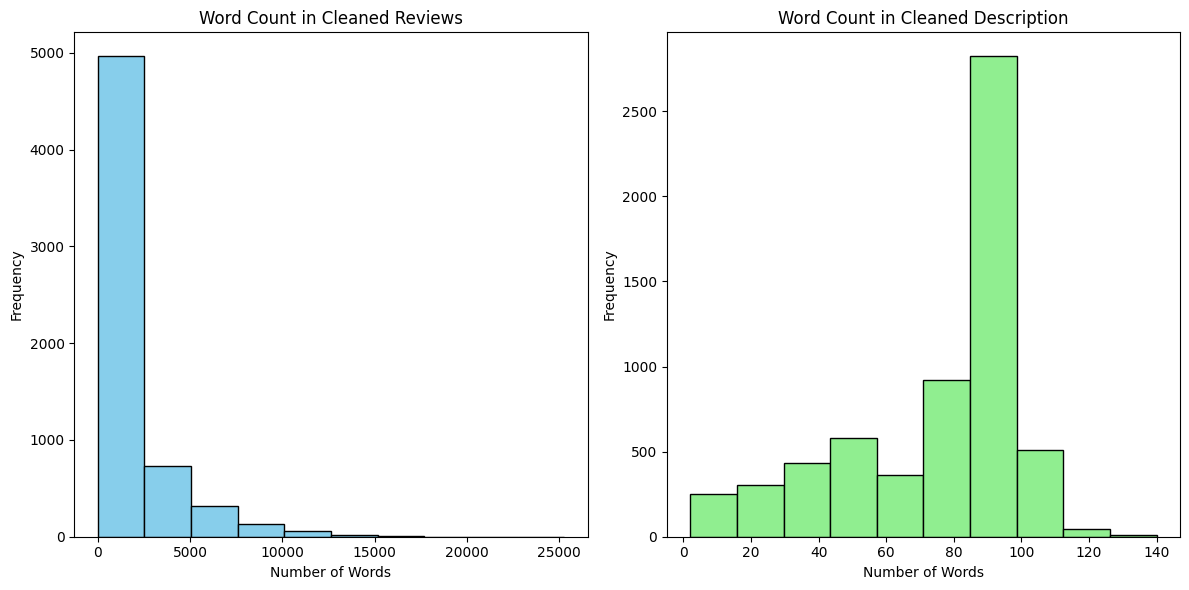

In [85]:
def count_words(text):
    if isinstance(text, str):
        return len(text.split())
    else:
        return np.nan  # or any other appropriate value for missing data

# Apply word count function to each column
train_preprocessed['cleaned_comments_word_count'] = train_preprocessed['all_comments_cleaned'].apply(count_words)
train_preprocessed['cleaned_description_word_count'] = train_preprocessed['cleaned_description'].apply(count_words)

# Plot histograms
plt.figure(figsize=(12, 6))

# Histogram for cleaned_comments_word_count
plt.subplot(1, 2, 1)
plt.hist(train_preprocessed['cleaned_comments_word_count'], bins=10, color='skyblue', edgecolor='black')
plt.title('Word Count in Cleaned Reviews')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

# Histogram for cleaned_description_word_count
plt.subplot(1, 2, 2)
plt.hist(train_preprocessed['cleaned_description_word_count'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Word Count in Cleaned Description')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Word Frequencies**

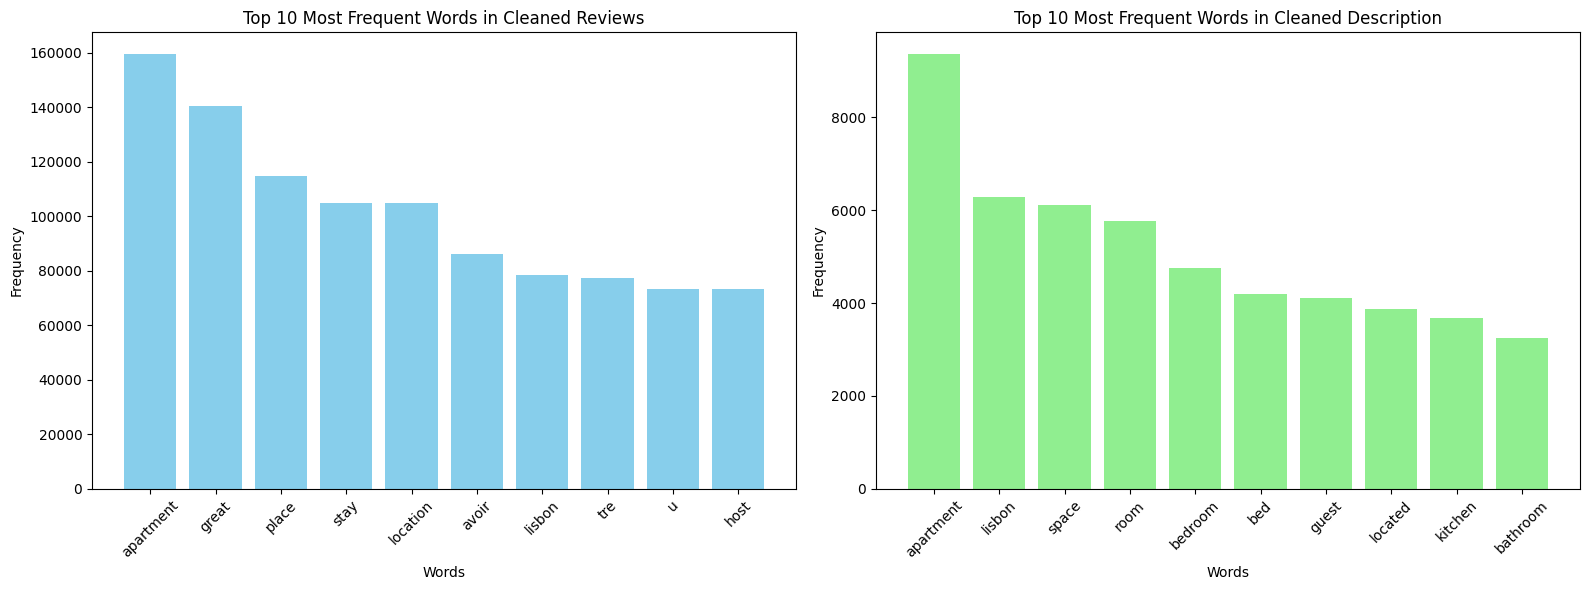

In [86]:
def count_word_frequencies(text_column, num_words=10):
    # Convert non-string values to strings
    text_column = [str(item) for item in text_column]

    # Join all text from the specified column into a single string
    all_text = ' '.join(text_column)

    # Convert text to lowercase and split into words
    words = all_text.lower().split()

    # Filter out common stop words (assuming STOPWORDS is defined somewhere)
    words = [word for word in words if word not in STOPWORDS]

    # Count word frequencies
    word_counts = Counter(words)

    # Get the most common words and their frequencies
    top_words = word_counts.most_common(num_words)

    return dict(top_words)

# Apply word count function to each column
top_words_cleaned_comments = count_word_frequencies(train_preprocessed['all_comments_cleaned'])
top_words_cleaned_description = count_word_frequencies(train_preprocessed['cleaned_description'])

# Plotting the histograms of most frequent words for both columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for 'cleaned_comments' column
axes[0].bar(top_words_cleaned_comments.keys(), top_words_cleaned_comments.values(), color='skyblue')
axes[0].set_title('Top 10 Most Frequent Words in Cleaned Reviews')
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Plot for 'cleaned_description' column
axes[1].bar(top_words_cleaned_description.keys(), top_words_cleaned_description.values(), color='lightgreen')
axes[1].set_title('Top 10 Most Frequent Words in Cleaned Description')
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout and display plots
plt.tight_layout()
plt.show()


**Word Cloud**

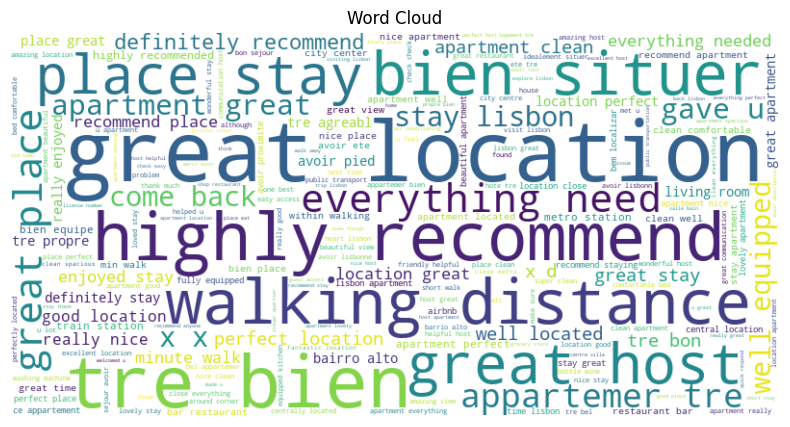

In [87]:
# Convert NaN values to empty strings and then join all the reviews and descriptions into a single string
comments = train_preprocessed['all_comments_cleaned'].fillna('').astype(str)
descriptions = train_preprocessed['cleaned_description'].fillna('').astype(str)
all_reviews_and_descriptions = ' '.join(comments) + ' ' + ' '.join(descriptions)

# Create WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_reviews_and_descriptions)

# Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud')
plt.show()


### 3.6 Train / Validation Split</font><div id="traintestsplit"></div>

In [88]:
# Sort the DataFrame by the index (houseID)
train_preprocessed_sorted = train_preprocessed.sort_index()

# Train-validation split for cleaned_train dataset with stratification
X_train, X_val, y_train, y_val = train_test_split(
    train_preprocessed_sorted[['all_comments_cleaned', 'cleaned_description']],
    train_preprocessed_sorted['unlisted'],  # Ensure this is a Series, not a DataFrame
    test_size=0.3,
    random_state=42,
    stratify=train_preprocessed_sorted['unlisted']  # Stratify by the target variable
)

# Test split for cleaned_test dataset
X_test = test_preprocessed[['all_comments_cleaned', 'cleaned_description']]

In [89]:
X_test.head()

,all_comments_cleaned,cleaned_description
houseID,,
1,thank much antonio perfect stay appartment per...,space apartment located historic center lisbon...
2,beautiful bright apartment residential area li...,important response covid property extended cle...
3,nocomment,bright beautiful spacious four bedroom apartme...
4,claudia great host met u train station bring u...,charming apartment close bay cascais bedroom d...
5,maison exactement comme photo tre propre drap ...,procurar um feria perto praia casino outro atr...


**Exporting the split to csv to make sure we always use the same split**

In [ ]:
# Exporting datasets to CSV
X_train.to_csv("X_train.csv")
X_val.to_csv("X_val.csv")
X_test.to_csv("X_test.csv")
y_train.to_csv("y_train.csv")
y_val.to_csv("y_val.csv")

## 4. Feature Engineering</font><div id="featureengineering"></div>


In this project, feature engineering played a crucial role in transforming raw textual data into meaningful features suitable for machine learning models. We employed a variety of techniques to extract and enhance the information from the text data. Initially, we conducted **Sentiment Analysis** to capture the emotional tone of the comments, providing an additional layer of insight. Next, we utilized **TF-IDF** to convert text into numerical vectors based on the frequency and inverse document frequency of terms. We also implemented **Bag of Words**, which represents text as a collection of word counts, providing a straightforward yet effective method of text representation.

To further enrich our feature set, we explored several **Word Embeddings** techniques. We used pre-trained **GloVe** embeddings to map words into high-dimensional space based on their co-occurrence statistics. Similarly, **Word2Vec** was employed to capture the semantic meaning of words through continuous bag-of-words and skip-gram models. Additionally, **FastText** was applied, which builds on Word2Vec by considering subword information, thus capturing more nuanced word meanings. Moreover, we incorporated advanced embeddings using **BERT sentence embeddings**, leveraging the power of transformer-based models to generate context-aware representations of sentences.

In this process, we created various datasets to test with different models later. The primary goal was to combine diverse dataset concepts with different models in hopes of finding a successful combination that performs well in the test split. This comprehensive feature engineering approach ensured that our models had access to a diverse and rich set of features, ultimately enhancing their predictive performance.


**Loading the previously done split**

In [7]:
# Load train-validation split datasets
X_train = pd.read_csv("X_train.csv", index_col=0)
X_val = pd.read_csv("X_val.csv", index_col=0)
X_test = pd.read_csv("X_test.csv", index_col=0)
y_train = pd.read_csv("y_train.csv", index_col=0)
y_val = pd.read_csv("y_val.csv", index_col=0)

### 4.1 Sentiment Analysis</font><div id="sentimentanalysis"></div>

Here, we will create two datasets: one applying sentiment analysis to comments and descriptions individually, and another combining both for analysis.

#### 4.1.1 Sentiment Analysis applied only to comments</font><div id="sentimentanalysiscomments"></div>

In [ ]:
X_train_sa = X_train.copy()
y_train_sa = y_train.copy()

X_val_sa = X_val.copy()
y_val_sa = y_val.copy()

In [ ]:
# Perform sentiment analysis on Comments
X_train_sa['sentiment_comments'] = X_train_sa['all_comments_cleaned'].apply(lambda text: TextBlob(text).sentiment.polarity)
# Classify sentiment into positive, negative, or neutral of Comments
X_train_sa['sentiment_comments_label'] = X_train_sa['sentiment_comments'].apply(lambda score: 'Positive' if score > 0 else 'Negative' if score < 0 else 'Neutral')

# Perform sentiment analysis on Comments
X_val_sa['sentiment_comments'] = X_val_sa['all_comments_cleaned'].apply(lambda text: TextBlob(text).sentiment.polarity)
# Classify sentiment into positive, negative, or neutral of Comments
X_val_sa['sentiment_comments_label'] = X_val_sa['sentiment_comments'].apply(lambda score: 'Positive' if score > 0 else 'Negative' if score < 0 else 'Neutral')


In [ ]:
# Perform sentiment analysis on Description
X_train_sa['sentiment_description'] = X_train_sa['cleaned_description'].apply(lambda text: TextBlob(text).sentiment.polarity)
# Classify sentiment into positive, negative, or neutral of Description
X_train_sa['sentiment_description_label'] = X_train_sa['sentiment_description'].apply(lambda score: 'Positive' if score > 0 else 'Negative' if score < 0 else 'Neutral')

# Perform sentiment analysis on Description
X_val_sa['sentiment_description'] = X_val_sa['cleaned_description'].apply(lambda text: TextBlob(text).sentiment.polarity)
# Classify sentiment into positive, negative, or neutral of Description
X_val_sa['sentiment_description_label'] = X_val_sa['sentiment_description'].apply(lambda score: 'Positive' if score > 0 else 'Negative' if score < 0 else 'Neutral')

In [ ]:
X_train_sa.head(5)

,all_comments_cleaned,cleaned_description,sentiment_comments,sentiment_comments_label,sentiment_description,sentiment_description_label
houseID,,,,,,
5532,nice flat lovely classy beautiful location won...,space apartment located rd floor xviii century...,0.420925,Positive,0.204762,Positive
6120,carolina place really lovely spacious clean ta...,start bbq roomy terrace dinner day seeing many...,0.205083,Positive,0.169643,Positive
2083,magnifique logement charme quartier pittoresqu...,super charming apartment amazing view alfama r...,0.332839,Positive,0.490000,Positive
948,nocomment,brand new semi detched villa opened july minut...,0.000000,Neutral,0.327273,Positive
1122,great experience darling little jewel box apar...,simple one bedroom apartment portuguese charm ...,0.282859,Positive,0.254122,Positive


In [ ]:
#COMMENTS
# Grouping sentiment labels and counting occurrences
sentiment_comments_counts = X_train_sa.groupby(['sentiment_comments_label']).size().reset_index(name='count')
sentiment_comments_counts

,sentiment_comments_label,count
0,Negative,9
1,Neutral,1423
2,Positive,2934


In [ ]:
#Description
sentiment_description_counts = X_train_sa.groupby(['sentiment_description_label']).size().reset_index(name='count')
sentiment_description_counts

,sentiment_description_label,count
0,Negative,171
1,Neutral,371
2,Positive,3824


**But is the description sentiment related with the comments sentiment? Lets Check**

In [ ]:
correlation = X_train_sa['sentiment_comments'].corr(X_train_sa['sentiment_description'])
print("Correlation between sentiment_comments and sentiment_description:", correlation)

Correlation between sentiment_comments and sentiment_description: 0.03942754385226346


**Does not look like it has a correlation... so we might drop the description or just merge it with the comments**

Lets see if after we merge them, the counts of the sentiment labels will change

#### 4.1.2 Sentiment Analysis applied to merged comments and description</font><div id="sentimentanalysismerged"></div>

In [ ]:
X_train_sa2 = X_train.copy()
y_train_sa2 = y_train.copy()

X_val_sa2 = X_val.copy()
y_val_sa2 = y_val.copy()

In [ ]:
# Merge two columns into a new column
X_train_sa2['comments_and_description_cleaned'] = X_train_sa2.apply(lambda row: row['all_comments_cleaned'] + ' ' + row['cleaned_description'], axis=1)

In [ ]:
# Perform sentiment analysis on comments_and_description_cleaned
X_train_sa2['sentiment_comments_and_description_cleaned'] = X_train_sa2['comments_and_description_cleaned'].apply(lambda text: TextBlob(text).sentiment.polarity)
# Classify sentiment into positive, negative, or neutral of comments_and_description_cleaned
X_train_sa2['sentiment_comments_and_description_label'] = X_train_sa2['sentiment_comments_and_description_cleaned'].apply(lambda score: 'Positive' if score > 0 else 'Negative' if score < 0 else 'Neutral')

# Perform sentiment analysis on comments_and_description_cleaned
X_val_sa2['sentiment_comments_and_description_cleaned'] = X_train_sa2['comments_and_description_cleaned'].apply(lambda text: TextBlob(text).sentiment.polarity)
# Classify sentiment into positive, negative, or neutral of comments_and_description_cleaned
X_val_sa2['sentiment_comments_and_description_label'] = X_train_sa2['sentiment_comments_and_description_cleaned'].apply(lambda score: 'Positive' if score > 0 else 'Negative' if score < 0 else 'Neutral')


In [ ]:
X_train_sa2.head(5)

,all_comments_cleaned,cleaned_description,comments_and_description_cleaned,sentiment_comments_and_description_cleaned,sentiment_comments_and_description_label
houseID,,,,,
5532,nice flat lovely classy beautiful location won...,space apartment located rd floor xviii century...,nice flat lovely classy beautiful location won...,0.420155,Positive
6120,carolina place really lovely spacious clean ta...,start bbq roomy terrace dinner day seeing many...,carolina place really lovely spacious clean ta...,0.203993,Positive
2083,magnifique logement charme quartier pittoresqu...,super charming apartment amazing view alfama r...,magnifique logement charme quartier pittoresqu...,0.337559,Positive
948,nocomment,brand new semi detched villa opened july minut...,nocomment brand new semi detched villa opened ...,0.327273,Positive
1122,great experience darling little jewel box apar...,simple one bedroom apartment portuguese charm ...,great experience darling little jewel box apar...,0.282170,Positive


In [ ]:
#Description
sentiment_comments_and_description_label_counts = X_train_sa2.groupby(['sentiment_comments_and_description_label']).size().reset_index(name='count')
sentiment_comments_and_description_label_counts

,sentiment_comments_and_description_label,count
0,Negative,68
1,Neutral,194
2,Positive,4104


**After looking at both tables, we can see that the percentage of negative comments is really low, and when merged gets even lower. BY analyzing the dataset, we don’t think that this sentiment analysis is quite accurate and we decided it would not be useful in taking any meaningful conclusions. As we can clearly see this only applies to the X_train, we will not me apply it the sentiment analysis to X_val**

### 4.2. TF-IDF</font><div id="tfidf"></div>

Here, we will create two datasets: one applying Tf-IDF to comments individually, and another combining both comments and description for analysis.

In [8]:
def extract_tfidf_features(data, max_df=0.8, ngram_range=(1, 3)):
    tfidf_vectorizer = TfidfVectorizer(max_df=max_df, ngram_range=ngram_range)
    tfidf_features = tfidf_vectorizer.fit_transform(data)
    return tfidf_vectorizer, tfidf_features

def visualize_tfidf_features(tfidf_vectorizer, tfidf_features, document_index=0):
    # Get feature names
    feature_names = tfidf_vectorizer.get_feature_names_out()

    # Get the TF-IDF vector for the specified document
    document_tfidf = tfidf_features[document_index]

    # Convert the TF-IDF vector to a dense format and create a DataFrame
    df = pd.DataFrame(document_tfidf.T.todense(), index=feature_names, columns=["TF-IDF"])

    # Sort the DataFrame by the TF-IDF scores in descending order
    df = df.sort_values('TF-IDF', ascending=False)

    # Print the top 25 features
    print(df.head(25))

#### 4.2.1 TF-IDF applied only to comments</font><div id="tfidf1"></div>

In [9]:
X_train_tfidf = X_train.copy()
y_train_tfidf = y_train.copy()

X_val_tfidf = X_val.copy()
y_val_tfidf = y_val.copy()

In [10]:
# Apply TF-IDF to the all_comments_cleaned in the training data
tfidf_vectorizer, X_train_tfidf = extract_tfidf_features(X_train_tfidf["all_comments_cleaned"])
X_val_tfidf = tfidf_vectorizer.transform(X_val_tfidf["all_comments_cleaned"])

y_train_tfidf = y_train.copy()
y_val_tfidf = y_val.copy()

# Visualize the TF-IDF features for the first document in the training set
visualize_tfidf_features(tfidf_vectorizer, X_train_tfidf)

                 TF-IDF
pedro          0.277384
apartment      0.274276
view           0.236586
great          0.186739
location       0.168429
lisbon         0.150448
studio         0.140117
stay           0.139415
place          0.126995
balcony        0.120221
antonio        0.120186
perfect        0.102609
amazing        0.090850
chiado         0.089563
host           0.087251
everything     0.086524
team           0.086079
restaurant     0.085186
pedro team     0.084044
would          0.079383
recommend      0.074895
beautiful      0.072027
clean          0.069061
well           0.062253
pedro antonio  0.060669


In [11]:
X_train_tfidf[0]

<1x6334494 sparse matrix of type '<class 'numpy.float64'>'
	with 31994 stored elements in Compressed Sparse Row format>

#### 4.2.2 TF-IDF applied to merged comments and description</font><div id="tfidf2"></div>

In [ ]:
X_train_tfidf2 = X_train.copy()
y_train_tfidf2 = y_train.copy()

X_val_tfidf2 = X_val.copy()
y_val_tfidf2 = y_val.copy()

In [ ]:
# Merge two columns into a new column
X_train_tfidf2['comments_and_description_cleaned'] = X_train_tfidf2.apply(lambda row: row['all_comments_cleaned'] + ' ' + row['cleaned_description'], axis=1)
X_val_tfidf2['comments_and_description_cleaned'] = X_val_tfidf2.apply(lambda row: row['all_comments_cleaned'] + ' ' + row['cleaned_description'], axis=1)

In [ ]:
# Apply TF-IDF to the all_comments_cleaned in the training data
tfidf_vectorizer, X_train_tfidf2 = extract_tfidf_features(X_train_tfidf2["comments_and_description_cleaned"])
X_val_tfidf2 = tfidf_vectorizer.transform(X_val_tfidf2["comments_and_description_cleaned"])

y_train_tfidf2 = y_train.copy()
y_val_tfidf2 = y_val.copy()

# Visualize the TF-IDF features for the first document in the training set
visualize_tfidf_features(tfidf_vectorizer, X_train_tfidf2)

                 TF-IDF
pedro          0.279143
apartment      0.240726
view           0.220756
great          0.188521
location       0.167299
studio         0.136774
stay           0.135938
lisbon         0.129449
place          0.125186
antonio        0.122539
balcony        0.111697
perfect        0.099360
amazing        0.091136
host           0.090170
pedro team     0.087645
team           0.087606
everything     0.086477
chiado         0.084990
would          0.082510
restaurant     0.081050
recommend      0.078004
clean          0.070736
beautiful      0.069394
pedro antonio  0.063268
well           0.061626


In [ ]:
X_train_tfidf2[0]

<1x6584671 sparse matrix of type '<class 'numpy.float64'>'
	with 32179 stored elements in Compressed Sparse Row format>

### 4.3. Bag Of Words</font><div id="bow"></div>

Here, we will create two datasets: one applying Tf-IDF to comments individually, and another combining both comments and description for analysis.

**CountVectorizer Parameters**

- **`input`**: Specifies the input format. Can be 'filename', 'file', or 'content'. Default is 'content'.
- **`encoding`**: Specifies the character encoding to use. Default is 'utf-8'.
- **`decode_error`**: Specifies what to do when a byte sequence is not decodable. Options are 'strict', 'ignore', or 'replace'. Default is 'strict'.
- **`strip_accents`**: Removes accents and other diacritics. Can be 'ascii', 'unicode', or None. Default is None.
- **`lowercase`**: Converts all characters to lowercase before tokenizing. Default is True.
- **`preprocessor`**: A custom preprocessing function to apply to each document before tokenization.
- **`tokenizer`**: A custom tokenization function to use instead of the default.
- **`stop_words`**: Removes stop words. Can be a string ('english'), a list of stop words, or None. Default is None.
- **`token_pattern`**: A regular expression denoting what constitutes a “token”. Default is `r'(?u)\b\w\w+\b'`.
- **`ngram_range`**: The lower and upper boundary of the range of n-values for different n-grams to be extracted. Default is (1, 1).
- **`analyzer`**: Determines whether the feature should be made of word or character n-grams. Can be 'word', 'char', or 'char_wb'. Default is 'word'.
- **`max_df`**: Ignore terms that have a document frequency strictly higher than the given threshold. Can be an integer (absolute counts) or a float (proportion of documents). Default is 1.0.
- **`min_df`**: Ignore terms that have a document frequency strictly lower than the given threshold. Can be an integer (absolute counts) or a float (proportion of documents). Default is 1.
- **`max_features`**: If not None, build a vocabulary that only considers the top `max_features` ordered by term frequency across the corpus.
- **`vocabulary`**: A mapping of terms to feature indices. Can be a dictionary or an iterable.
- **`binary`**: If True, all non-zero counts are set to 1. This is useful for binary occurrences rather than counts. Default is False.
- **`dtype`**: The type of the matrix returned by `fit_transform()` or `transform()`. Default is `np.int64`.


#### 4.3.1 BoW applied only to comments</font><div id="bow1"></div>

In [ ]:
X_train_bow = X_train.copy()
y_train_bow = y_train.copy()

X_val_bow = X_val.copy()
y_val_bow = y_val.copy()

In [ ]:
vectorizer = CountVectorizer()

# Fit the vectorizer on the training data and transform the training data into a bag-of-words representation
X_train_bow = vectorizer.fit_transform(X_train_bow['all_comments_cleaned'])

# Convert the training labels to a numpy array
y_train_bow = np.array(y_train_bow)

# Transform the validation data using the already fitted vectorizer
X_val_bow = vectorizer.transform(X_val_bow['all_comments_cleaned'])

# Convert the validation labels to a numpy array
y_val_bow = np.array(y_val_bow)

In [ ]:
X_train_bow

<4366x91598 sparse matrix of type '<class 'numpy.int64'>'
	with 2495806 stored elements in Compressed Sparse Row format>

#### 4.3.2 BoW applied to merged comments and description</font><div id="bow2"></div>

In [ ]:
X_train_bow2 = X_train.copy()
y_train_bow2 = y_train.copy()

X_val_bow2 = X_val.copy()
y_val_bow2 = y_val.copy()

In [ ]:
# Merge two columns into a new column
X_train_bow2['comments_and_description_cleaned'] = X_train_bow2.apply(lambda row: row['all_comments_cleaned'] + ' ' + row['cleaned_description'], axis=1)
X_val_bow2['comments_and_description_cleaned'] = X_val_bow2.apply(lambda row: row['all_comments_cleaned'] + ' ' + row['cleaned_description'], axis=1)

In [ ]:
vectorizer = CountVectorizer()

# Fit the vectorizer on the training data and transform the training data into a bag-of-words representation
X_train_bow2 = vectorizer.fit_transform(X_train_bow2['comments_and_description_cleaned'])

# Convert the training labels to a numpy array
y_train_bow2 = np.array(y_train_bow2)

# Transform the validation data using the already fitted vectorizer
X_val_bow2 = vectorizer.transform(X_val_bow2['comments_and_description_cleaned'])

# Convert the validation labels to a numpy array
y_val_bow2 = np.array(y_val_bow2)

In [ ]:
X_train_bow2

<4366x94334 sparse matrix of type '<class 'numpy.int64'>'
	with 2677752 stored elements in Compressed Sparse Row format>

### 4.4. Word Embeddings</font><div id="wordembeddings"></div>

#### 4.4.1. Glove</font><div id="glove"></div>

In [ ]:
glove_model = api.load('glove-wiki-gigaword-100')
print('Loaded GloVe model successfully.')

[===========================================-------] 88.0% 112.7/128.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Loaded GloVe model successfully.


In [ ]:
def apply_glove_embeddings(text):
    words = text.split()
    embeddings = [glove_model[word] if word in glove_model else np.zeros(glove_model.vector_size)
                  for word in words]
    return np.mean(embeddings, axis=0) if embeddings else np.zeros(glove_model.vector_size)
def add_glove_embeddings(df, text_column):
    return df[text_column].apply(lambda x: apply_glove_embeddings(str(x)))

##### 4.4.1.1 GloVe applied to comments</font><div id="glove1"></div>

In [ ]:
X_train_glove = X_train.copy()
y_train_glove = y_train.copy()

X_val_glove = X_val.copy()
y_val_glove = y_val.copy()

In [ ]:
X_train_glove['all_comments_cleaned_embedding'] = add_glove_embeddings(X_train_glove, 'all_comments_cleaned')
X_val_glove['all_comments_cleaned_embedding'] = add_glove_embeddings(X_val_glove, 'all_comments_cleaned')

##### 4.4.1.2 GloVe applied to merged comments and description</font><div id="glove2"></div>

In [ ]:
X_train_glove2 = X_train.copy()
y_train_glove2 = y_train.copy()

X_val_glove2 = X_val.copy()
y_val_glove2 = y_val.copy()

In [ ]:
# Merge two columns into a new column
X_train_glove2['comments_and_description_cleaned'] = X_train_glove2.apply(lambda row: row['all_comments_cleaned'] + ' ' + row['cleaned_description'], axis=1)
X_val_glove2['comments_and_description_cleaned'] = X_val_glove2.apply(lambda row: row['all_comments_cleaned'] + ' ' + row['cleaned_description'], axis=1)

In [ ]:
X_train_glove2['comments_and_description_cleaned_embedding'] = add_glove_embeddings(X_train_glove2, 'comments_and_description_cleaned')
X_val_glove2['comments_and_description_cleaned_embedding'] = add_glove_embeddings(X_val_glove2, 'comments_and_description_cleaned')

#### 4.4.2 Word2Vec</font><div id="word2vec"></div>

In [ ]:
word2vec_model  = api.load("word2vec-google-news-300")
print('Loaded Word2Vec model successfully.')

Loaded Word2Vec model successfully.


In [ ]:
def apply_word2vec_embeddings(text):
    words = text.split()
    embeddings = [word2vec_model[word] if word in word2vec_model else np.zeros(word2vec_model.vector_size)
                  for word in words]
    return np.mean(embeddings, axis=0) if embeddings else np.zeros(word2vec_model.vector_size)

def add_word2vec_embeddings(df, text_column):
    return df[text_column].apply(lambda x: apply_word2vec_embeddings(str(x)))

##### 4.4.2.1 Word2Vec applied to comments</font><div id="word2vec1"></div>

In [ ]:
X_train_word2vec = X_train.copy()
y_train_word2vec = y_train.copy()

X_val_word2vec = X_val.copy()
y_val_word2vec = y_val.copy()

In [ ]:
X_train_word2vec['all_comments_cleaned_embedding'] = add_glove_embeddings(X_train_word2vec, 'all_comments_cleaned')
X_val_word2vec['all_comments_cleaned_embedding'] = add_glove_embeddings(X_val_word2vec, 'all_comments_cleaned')

##### 4.4.2.2 Word2Vec applied to merged comments and description</font><div id="word2vec2"></div>

In [ ]:
X_train_word2vec2 = X_train.copy()
y_train_word2vec2 = y_train.copy()

X_val_word2vec2 = X_val.copy()
y_val_word2vec2 = y_val.copy()

In [ ]:
# Merge two columns into a new column
X_train_word2vec2['comments_and_description_cleaned'] = X_train_word2vec2.apply(lambda row: row['all_comments_cleaned'] + ' ' + row['cleaned_description'], axis=1)
X_val_word2vec2['comments_and_description_cleaned'] = X_val_word2vec2.apply(lambda row: row['all_comments_cleaned'] + ' ' + row['cleaned_description'], axis=1)

In [ ]:
X_train_word2vec2['comments_and_description_cleaned_embedding'] = add_glove_embeddings(X_train_word2vec2, 'comments_and_description_cleaned')
X_val_word2vec2['comments_and_description_cleaned_embedding'] = add_glove_embeddings(X_val_word2vec2, 'comments_and_description_cleaned')

#### 4.4.3 FastText (extension of Word2Vec)</font><div id="fasttext"></div>

In [ ]:
fasttext_model = api.load('fasttext-wiki-news-subwords-300')
print('Loaded FastText model successfully.')

Loaded FastText model successfully.


In [ ]:
def apply_fasttext_embeddings(text):
    words = text.split()
    embeddings = [fasttext_model[word] for word in words]
    return np.mean(embeddings, axis=0) if embeddings else np.zeros(fasttext_model.vector_size)

def add_fasttext_embeddings(df, text_column):
    return df[text_column].apply(lambda x: apply_fasttext_embeddings(str(x)))

##### 4.4.3.1 Fast Text applied to comments</font><div id="fasttext1"></div>

In [ ]:
X_train_ft = X_train.copy()
y_train_ft = y_train.copy()

X_val_ft = X_val.copy()
y_val_ft = y_val.copy()

In [ ]:
X_train_ft['all_comments_cleaned_embedding'] = add_glove_embeddings(X_train_ft, 'all_comments_cleaned')
X_val_ft['all_comments_cleaned_embedding'] = add_glove_embeddings(X_val_ft, 'all_comments_cleaned')

##### 4.4.3.2 Fast Text applied to merged comments and description</font><div id="fasttext2"></div>

In [ ]:
X_train_ft2 = X_train.copy()
y_train_ft2 = y_train.copy()

X_val_ft2 = X_val.copy()
y_val_ft2 = y_val.copy()

In [ ]:
# Merge two columns into a new column
X_train_ft2['comments_and_description_cleaned'] = X_train_ft2.apply(lambda row: row['all_comments_cleaned'] + ' ' + row['cleaned_description'], axis=1)
X_val_ft2['comments_and_description_cleaned'] = X_val_ft2.apply(lambda row: row['all_comments_cleaned'] + ' ' + row['cleaned_description'], axis=1)

In [ ]:
X_train_ft2['comments_and_description_cleaned_embedding'] = add_glove_embeddings(X_train_ft2, 'comments_and_description_cleaned')
X_val_ft2['comments_and_description_cleaned_embedding'] = add_glove_embeddings(X_val_ft2, 'comments_and_description_cleaned')

### 4.5. BERT sentence embeddings</font><div id="bert"></div>

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')

def get_sentence_embedding(text):
    return model.encode(text)

C:\Users\barbara\anaconda3\envs\Faculdade\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\barbara\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
C:\Users\barbara\anaconda3\envs\Faculdade\Lib\site-packages\huggingface_hub\file_d

#### 4.5.1 BERT applied to comments</font><div id="bert1"></div>

In [ ]:
X_train_bert = X_train.copy()
y_train_bert = y_train.copy()

X_val_bert = X_val.copy()
y_val_bert = y_val.copy()

In [ ]:
X_train_bert = pd.DataFrame(X_train['all_comments_cleaned'].apply(get_sentence_embedding).tolist())
X_val_bert = pd.DataFrame(X_val['all_comments_cleaned'].apply(get_sentence_embedding).tolist())

#### 4.5.2 Bert applied to merged comments and description</font><div id="bert2"></div>

In [ ]:
X_train_bert2 = X_train.copy()
y_train_bert2 = y_train.copy()

X_val_bert2 = X_val.copy()
y_val_bert2 = y_val.copy()

In [ ]:
X_train_bert2['comments_and_description_cleaned'] = X_train_bert2.apply(lambda row: row['all_comments_cleaned'] + ' ' + row['cleaned_description'], axis=1)
X_val_bert2['comments_and_description_cleaned'] = X_val_bert2.apply(lambda row: row['all_comments_cleaned'] + ' ' + row['cleaned_description'], axis=1)

In [ ]:
X_train_bert2 = pd.DataFrame(X_train_bert2['comments_and_description_cleaned'].apply(get_sentence_embedding).tolist())
X_val_bert2 = pd.DataFrame(X_val_bert2['comments_and_description_cleaned'].apply(get_sentence_embedding).tolist())

## 5. Modelling</font><div id="modelling"></div>

In the modelling section of our project, we explored a range of machine learning algorithms to predict our target variable. Our efforts spanned several classic and advanced modelling techniques: K-Nearest Neighbors (KNN), Logistic Regression, Naive Bayes, and advanced transformer-based models. For each of these models, we experimented with various feature engineering techniques to ensure robust model performance. The feature engineering methods included TF-IDF, Bag of Words, and several word embeddings such as GloVe, Word2Vec, and FastText.

Specifically, for each of the models (KNN, Logistic Regression, Naive Bayes, and Transformers), we evaluated their performance using datasets created from different feature engineering approaches. These approaches included:

1. **TF-IDF**: Transforming the text data into TF-IDF vectors.
2. **Bag of Words**: Converting the text into a bag-of-words representation.
3. **Word Embeddings**:
   - **GloVe**: Using pre-trained GloVe embeddings.
   - **Word2Vec**: Utilizing pre-trained Word2Vec embeddings.
   - **FastText**: Applying pre-trained FastText embeddings.

For each feature engineering technique, we created two distinct datasets: one consisting solely of the comments and another that merged the comments with descriptions. This allowed us to assess how the addition of descriptions influenced the model performance. Through comprehensive model selection and hyperparameter tuning, we aimed to identify the optimal configuration for each algorithm, ensuring the best possible predictive accuracy for our task.


In [12]:
def plot_cm(confusion_matrix: np.array, classnames: list):
    """
    Function that creates a confusion matrix plot using the Wikipedia convention for the axis.
    :param confusion_matrix: confusion matrix that will be plotted
    :param classnames: labels of the classes

    Returns:
        - Plot of the Confusion Matrix
    """

    confusionmatrix = confusion_matrix
    class_names = classnames

    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(confusionmatrix, cmap=plt.cm.cividis)
    plt.colorbar(im, ax=ax)

    # We want to show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            text = ax.text(j, i, confusionmatrix[i, j],
                           ha="center", va="center", color="white")

    # Set the axis labels
    ax.set_xlabel('Predicted label', fontsize=14)
    ax.set_ylabel('True label', fontsize=14)
    ax.set_title("Confusion Matrix", fontsize=16)

    # Adjust layout for better appearance
    plt.tight_layout()

    # Show the plot
    plt.show()

First, we need to determine whether to use only the comments or to merge the comments with the description. To decide this, we will conduct tests using a simple model, such as KNN. This will help us identify the best option for the models we plan to test.

### 5.1 KNN</font><div id="knn"></div>

### 5.1.1.1 KNN with TF-IDF applied only to comments

In [ ]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train_tfidf, y_train_tfidf)

# Predict the labels for the validation set
y_pred_knn_tfidf = knn.predict(X_val_tfidf)

# Print the Classification Report
print(classification_report(y_val_tfidf, y_pred_knn_tfidf))

C:\Users\TCastilho\anaconda3\envs\TextMining\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.73      1.00      0.84      1361
           1       0.00      0.00      0.00       511

    accuracy                           0.73      1872
   macro avg       0.36      0.50      0.42      1872
weighted avg       0.53      0.73      0.61      1872



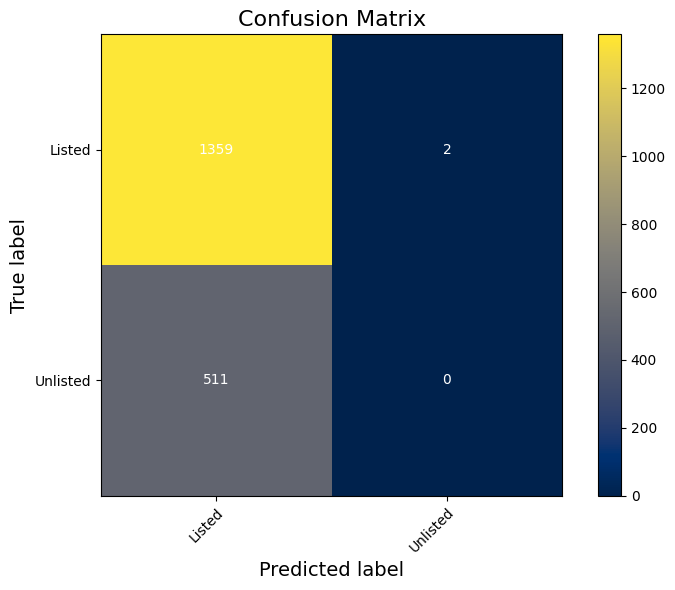

In [ ]:
# Example labels and confusion matrix
labels = ["Listed", "Unlisted"]
cm = confusion_matrix(y_val_tfidf, y_pred_knn_tfidf)

# Plot the confusion matrix
plot_cm(cm, labels)

### 5.1.1.2 KNN with TF-IDF applied to merged comments and description

In [ ]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train_tfidf2, y_train_tfidf2)

# Predict the labels for the validation set
y_pred_knn_tfidf2 = knn.predict(X_val_tfidf2)

# Print the Classification Report
print(classification_report(y_val_tfidf2, y_pred_knn_tfidf2))

C:\Users\TCastilho\anaconda3\envs\TextMining\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1361
           1       0.73      0.55      0.63       511

    accuracy                           0.82      1872
   macro avg       0.79      0.74      0.75      1872
weighted avg       0.81      0.82      0.81      1872



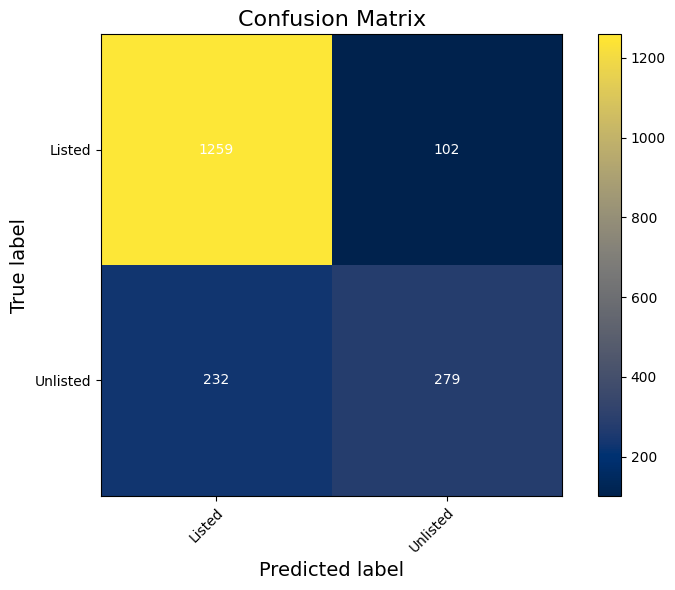

In [ ]:
# Example labels and confusion matrix
labels = ["Listed", "Unlisted"]
cm = confusion_matrix(y_val_tfidf2, y_pred_knn_tfidf2)

# Plot the confusion matrix
plot_cm(cm, labels)

### 5.1.2.1 KNN with BoW applied only to comments

In [ ]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train_bow, y_train_bow)

# Predict the labels for the validation set
y_pred_knn_bow = knn.predict(X_val_bow)

# Print the Classification Report
print(classification_report(y_val_bow, y_pred_knn_bow))

C:\Users\TCastilho\anaconda3\envs\TextMining\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.94      0.83      0.88      1361
           1       0.66      0.85      0.74       511

    accuracy                           0.84      1872
   macro avg       0.80      0.84      0.81      1872
weighted avg       0.86      0.84      0.84      1872



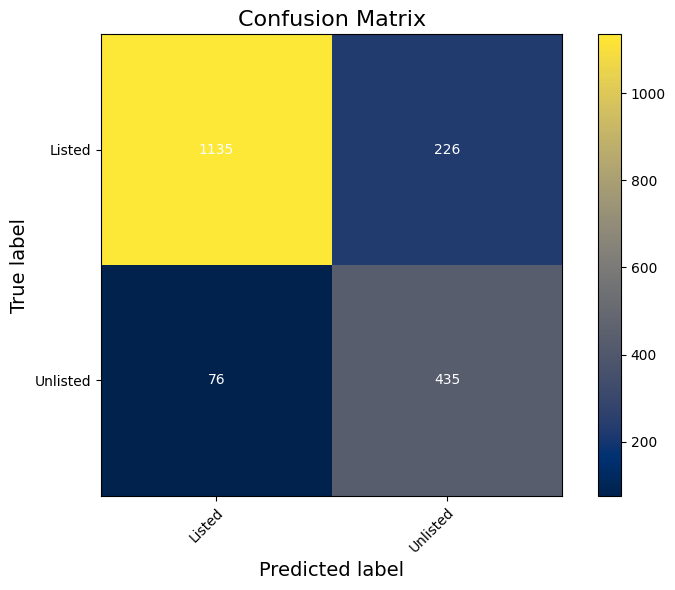

In [ ]:
# Example labels and confusion matrix
labels = ["Listed", "Unlisted"]
cm = confusion_matrix(y_val_bow, y_pred_knn_bow)

# Plot the confusion matrix
plot_cm(cm, labels)

### 5.1.2.2 KNN with BoW applied to merged comments and description

In [ ]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train_bow2, y_train_bow2)

# Predict the labels for the validation set
y_pred_knn_bow2 = knn.predict(X_val_bow2)

# Print the Classification Report
print(classification_report(y_val_bow2, y_pred_knn_bow2))

C:\Users\TCastilho\anaconda3\envs\TextMining\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1361
           1       0.58      0.77      0.67       511

    accuracy                           0.79      1872
   macro avg       0.74      0.78      0.76      1872
weighted avg       0.82      0.79      0.80      1872



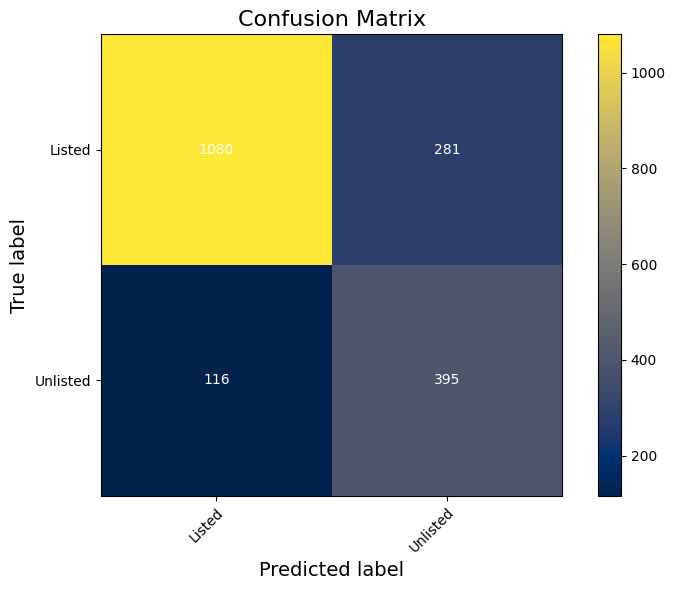

In [ ]:
# Example labels and confusion matrix
labels = ["Listed", "Unlisted"]
cm = confusion_matrix(y_val_bow2, y_pred_knn_bow2)

# Plot the confusion matrix
plot_cm(cm, labels)

### 5.1.3.1 KNN with GloVe applied only to comments

In [ ]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train_glove['all_comments_cleaned_embedding'].tolist(), y_train_glove)

# Predict the labels for the validation set
y_pred_knn_glove = knn.predict(X_val_glove['all_comments_cleaned_embedding'].tolist())

# Print the Classification Report
print(classification_report(y_val_glove, y_pred_knn_glove))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1361
           1       0.70      0.84      0.76       511

    accuracy                           0.86      1872
   macro avg       0.82      0.85      0.83      1872
weighted avg       0.87      0.86      0.86      1872



C:\Users\TCastilho\anaconda3\envs\TextMining\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


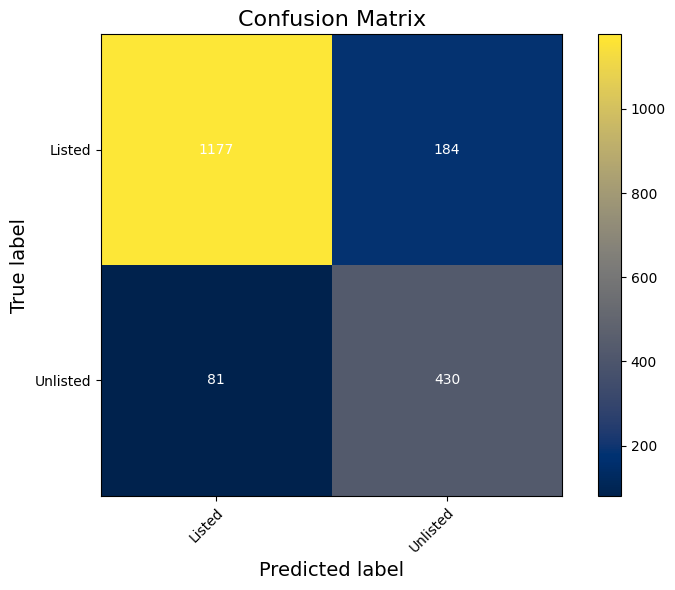

In [ ]:
# Example labels and confusion matrix
labels = ["Listed", "Unlisted"]
cm = confusion_matrix(y_val_glove, y_pred_knn_glove)

# Plot the confusion matrix
plot_cm(cm, labels)

### 5.1.3.2 KNN with GloVe applied to merged comments and description

In [ ]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train_glove2['comments_and_description_cleaned_embedding'].tolist(), y_train_glove2)

# Predict the labels for the validation set
y_pred_knn_glove2 = knn.predict(X_val_glove2['comments_and_description_cleaned_embedding'].tolist())

# Print the Classification Report
print(classification_report(y_val_glove2, y_pred_knn_glove2))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1361
           1       0.73      0.52      0.61       511

    accuracy                           0.82      1872
   macro avg       0.78      0.73      0.75      1872
weighted avg       0.81      0.82      0.81      1872



C:\Users\TCastilho\anaconda3\envs\TextMining\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


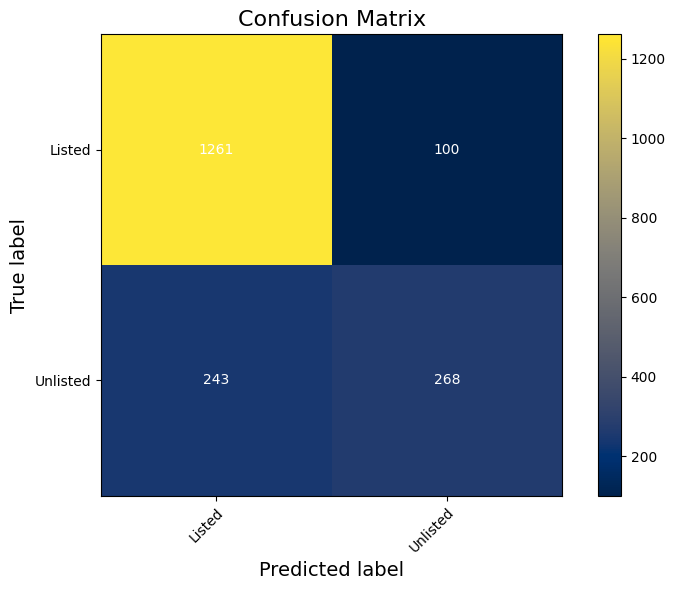

In [ ]:
# Example labels and confusion matrix
labels = ["Listed", "Unlisted"]
cm = confusion_matrix(y_val_glove2, y_pred_knn_glove2)

# Plot the confusion matrix
plot_cm(cm, labels)

### 5.1.4.1 KNN with Word2Vec applied only to comments

In [ ]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train_word2vec['all_comments_cleaned_embedding'].tolist(), y_train_word2vec)

# Predict the labels for the validation set
y_pred_knn_word2vec = knn.predict(X_val_word2vec['all_comments_cleaned_embedding'].tolist())

# Print the Classification Report
print(classification_report(y_val_word2vec, y_pred_knn_word2vec))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1361
           1       0.70      0.84      0.76       511

    accuracy                           0.86      1872
   macro avg       0.82      0.85      0.83      1872
weighted avg       0.87      0.86      0.86      1872



C:\Users\TCastilho\anaconda3\envs\TextMining\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


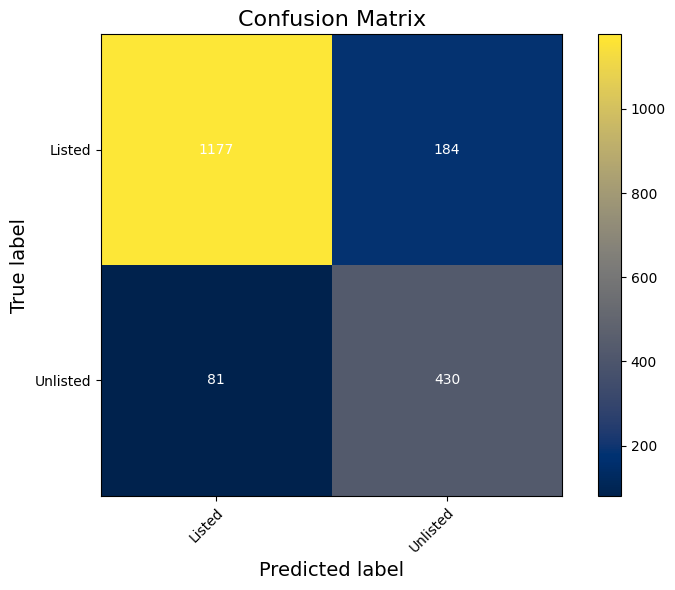

In [ ]:
# Example labels and confusion matrix
labels = ["Listed", "Unlisted"]
cm = confusion_matrix(y_val_word2vec, y_pred_knn_word2vec)

# Plot the confusion matrix
plot_cm(cm, labels)

### 5.1.4.2 KNN with Word2Vec applied to merged comments and description

In [ ]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train_word2vec2['comments_and_description_cleaned_embedding'].tolist(), y_train_word2vec2)

# Predict the labels for the validation set
y_pred_knn_word2vec2 = knn.predict(X_val_word2vec2['comments_and_description_cleaned_embedding'].tolist())

# Print the Classification Report
print(classification_report(y_val_word2vec2, y_pred_knn_word2vec2))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1361
           1       0.73      0.52      0.61       511

    accuracy                           0.82      1872
   macro avg       0.78      0.73      0.75      1872
weighted avg       0.81      0.82      0.81      1872



C:\Users\TCastilho\anaconda3\envs\TextMining\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


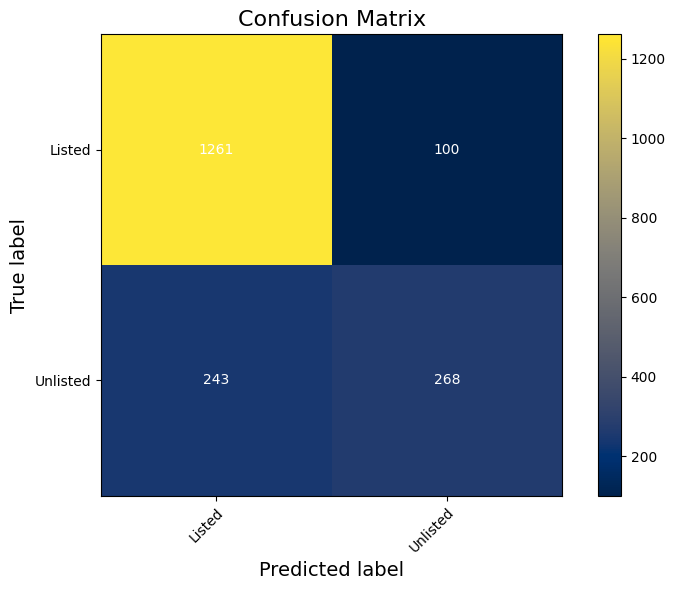

In [ ]:
# Example labels and confusion matrix
labels = ["Listed", "Unlisted"]
cm = confusion_matrix(y_val_word2vec2, y_pred_knn_word2vec2)

# Plot the confusion matrix
plot_cm(cm, labels)

### 5.1.5.1 KNN with FastText applied only to comments

In [ ]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train_ft['all_comments_cleaned_embedding'].tolist(), y_train_ft)

# Predict the labels for the validation set
y_pred_knn_ft = knn.predict(X_val_ft['all_comments_cleaned_embedding'].tolist())

# Print the Classification Report
print(classification_report(y_val_ft, y_pred_knn_ft))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1361
           1       0.70      0.84      0.76       511

    accuracy                           0.86      1872
   macro avg       0.82      0.85      0.83      1872
weighted avg       0.87      0.86      0.86      1872



C:\Users\TCastilho\anaconda3\envs\TextMining\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


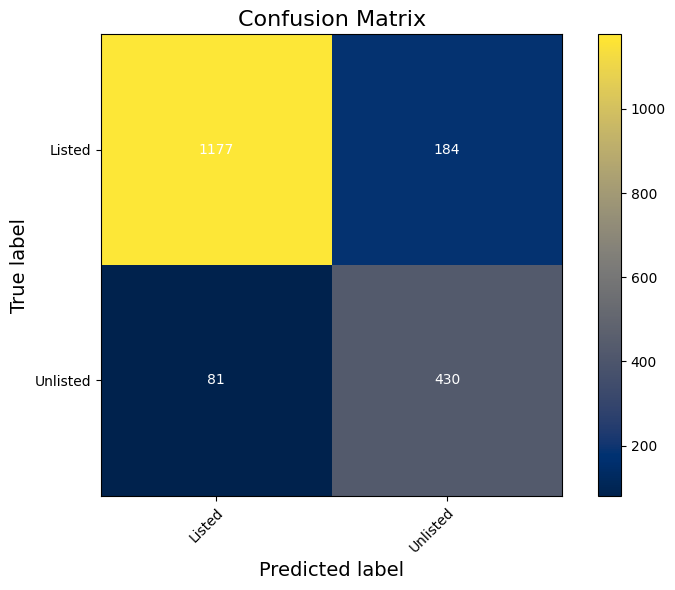

In [ ]:
# Example labels and confusion matrix
labels = ["Listed", "Unlisted"]
cm = confusion_matrix(y_val_ft, y_pred_knn_ft)

# Plot the confusion matrix
plot_cm(cm, labels)

### 5.1.5.2 KNN with FastText applied to merged comments and description

In [ ]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train_ft2['comments_and_description_cleaned_embedding'].tolist(), y_train_ft2)

# Predict the labels for the validation set
y_pred_knn_ft2 = knn.predict(X_val_ft2['comments_and_description_cleaned_embedding'].tolist())

# Print the Classification Report
print(classification_report(y_val_ft2, y_pred_knn_ft2))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1361
           1       0.73      0.52      0.61       511

    accuracy                           0.82      1872
   macro avg       0.78      0.73      0.75      1872
weighted avg       0.81      0.82      0.81      1872



C:\Users\TCastilho\anaconda3\envs\TextMining\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


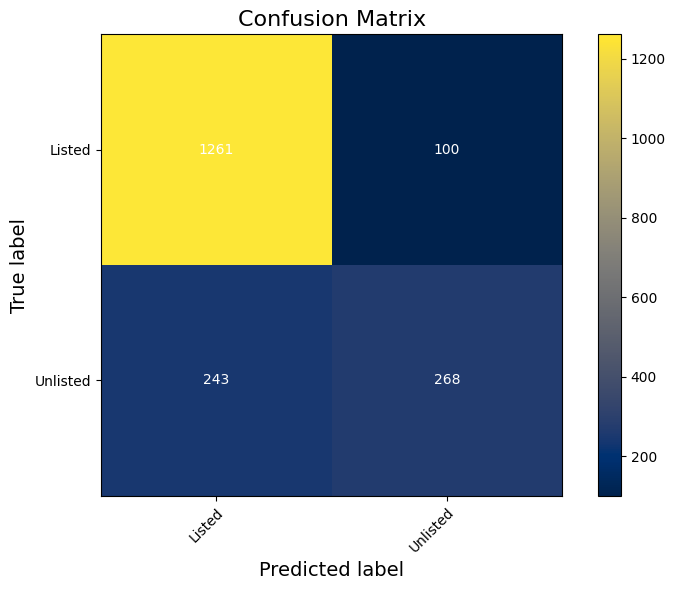

In [ ]:
# Example labels and confusion matrix
labels = ["Listed", "Unlisted"]
cm = confusion_matrix(y_val_ft2, y_pred_knn_ft2)

# Plot the confusion matrix
plot_cm(cm, labels)

#### 5.1.6.1 KNN with BERT applied to only comments

In [ ]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train_bert, y_train_bert)

# Predict the labels for the validation set
y_pred_knn_bert = knn.predict(X_val_bert)

# Print the Classification Report
print(classification_report(y_val_bert, y_pred_knn_bert))

C:\Users\barbara\anaconda3\envs\Faculdade\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.93      0.86      0.90      1361
           1       0.70      0.84      0.76       511

    accuracy                           0.86      1872
   macro avg       0.82      0.85      0.83      1872
weighted avg       0.87      0.86      0.86      1872



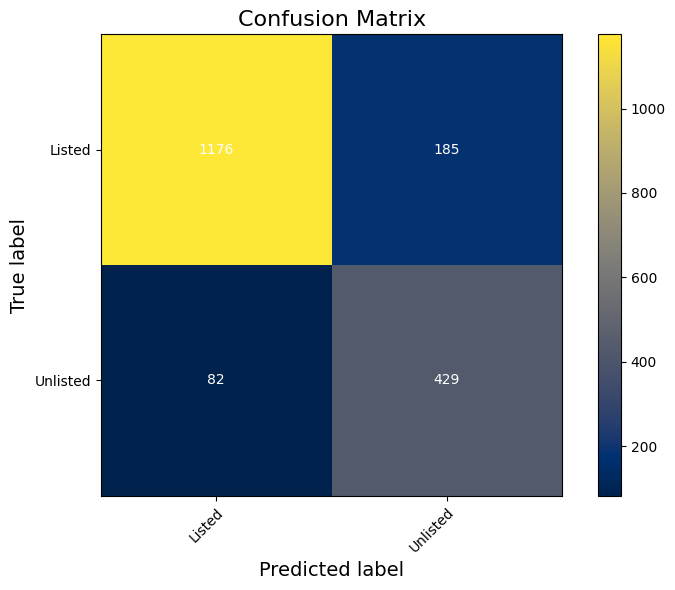

In [ ]:
# Example labels and confusion matrix
labels = ["Listed", "Unlisted"]
cm = confusion_matrix(y_val_bert, y_pred_knn_bert)

# Plot the confusion matrix
plot_cm(cm, labels)

#### 5.1.6.2 KNN with BERT applied to merged comments and descriptions

In [ ]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train_bert2, y_train_bert2)

# Predict the labels for the validation set
y_pred_knn_bert2 = knn.predict(X_val_bert2)

# Print the Classification Report
print(classification_report(y_val_bert2, y_pred_knn_bert2))

C:\Users\barbara\anaconda3\envs\Faculdade\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1361
           1       0.71      0.74      0.73       511

    accuracy                           0.85      1872
   macro avg       0.81      0.82      0.81      1872
weighted avg       0.85      0.85      0.85      1872



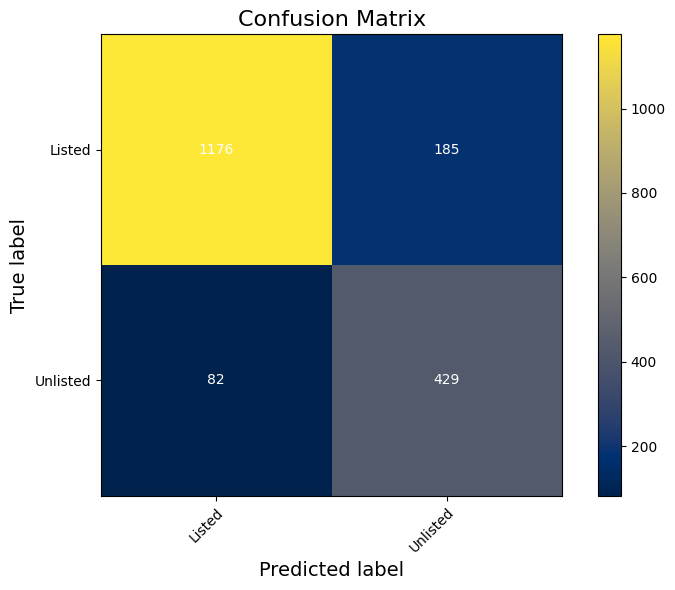

In [ ]:
# Example labels and confusion matrix
labels = ["Listed", "Unlisted"]
cm = confusion_matrix(y_val_bert, y_pred_knn_bert)

# Plot the confusion matrix
plot_cm(cm, labels)

### 5.2 Logistic Regression</font><div id="logreg"></div>

### 5.2.1.1 Logistic regression with TF-IDF applied only to comments

In [10]:
# Create a logistic regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train_tfidf, y_train_tfidf)

# Predict on the validation data
y_pred_lg_tfidf = logreg.predict(X_val_tfidf)

# Print the classification report
print(classification_report(y_val_tfidf, y_pred_lg_tfidf))

C:\Users\TCastilho\anaconda3\envs\TextMining\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.94      0.87      0.90      1361
           1       0.70      0.84      0.77       511

    accuracy                           0.86      1872
   macro avg       0.82      0.85      0.83      1872
weighted avg       0.87      0.86      0.86      1872



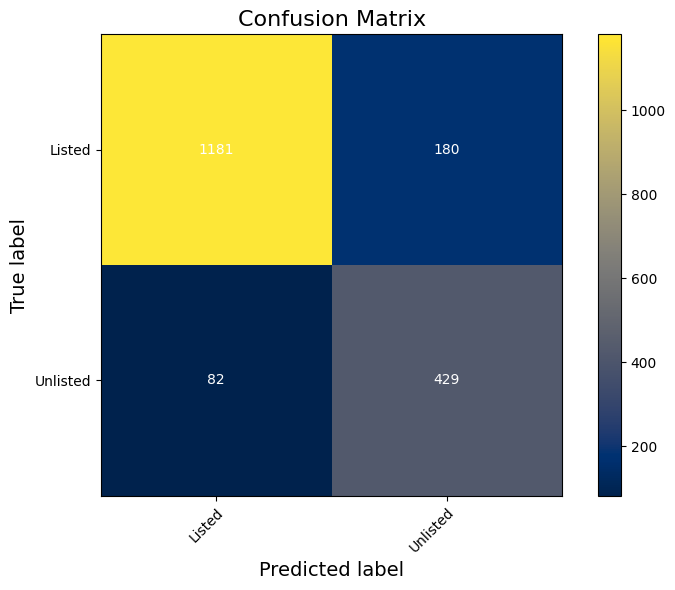

In [13]:
# Example labels and confusion matrix
labels = ["Listed", "Unlisted"]
cm = confusion_matrix(y_val_tfidf, y_pred_lg_tfidf)

# Plot the confusion matrix
plot_cm(cm, labels)

### 5.2.1.2 Logistic Regression with TF-IDF applied to merged comments and description

In [ ]:
# Create a logistic regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train_tfidf2, y_train_tfidf2)

# Predict on the validation data
y_pred_lg_tfidf2 = logreg.predict(X_val_tfidf2)

# Print the classification report
print(classification_report(y_val_tfidf2, y_pred_lg_tfidf2))

C:\Users\barbara\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1361
           1       0.78      0.65      0.71       511

    accuracy                           0.85      1872
   macro avg       0.83      0.79      0.81      1872
weighted avg       0.85      0.85      0.85      1872



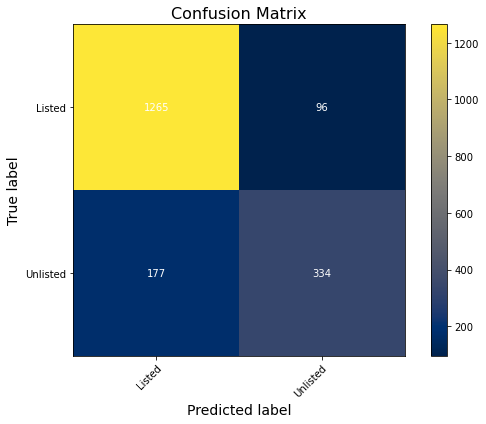

In [ ]:
# Example labels and confusion matrix
labels = ["Listed", "Unlisted"]
cm = confusion_matrix(y_val_tfidf2, y_pred_lg_tfidf2)

# Plot the confusion matrix
plot_cm(cm, labels)

### 5.2.2.1 Logistic Regression with BoW applied only to comments

In [ ]:
# Create a logistic regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train_bow, y_train_bow)

# Predict on the validation data
y_pred_lg_bow = logreg.predict(X_val_bow)

# Print the classification report
print(classification_report(y_val_bow, y_pred_lg_bow))

C:\Users\barbara\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0       0.94      0.85      0.89      1361
           1       0.68      0.85      0.75       511

    accuracy                           0.85      1872
   macro avg       0.81      0.85      0.82      1872
weighted avg       0.86      0.85      0.85      1872



C:\Users\barbara\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


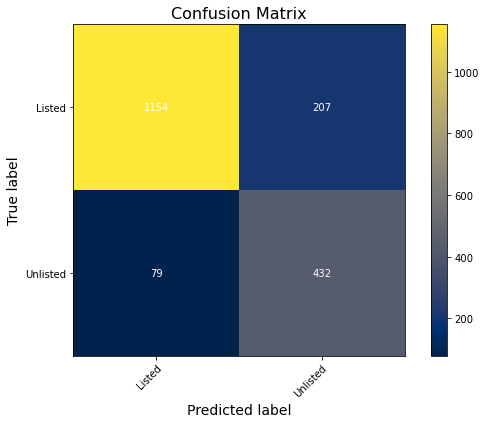

In [ ]:
labels = ["Listed", "Unlisted"]
cm = confusion_matrix(y_val_bow, y_pred_lg_bow)


# Plot the confusion matrix
plot_cm(cm, labels)

### 5.2.2.2 Logistic Regression with BoW applied to merged comments and description

In [ ]:
# Create a logistic regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train_bow2, y_train_bow2)

# Predict on the validation data
y_pred_lg_bow2 = logreg.predict(X_val_bow2)

# Print the classification report
print(classification_report(y_val_bow2, y_pred_lg_bow2))

C:\Users\barbara\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1361
           1       0.71      0.73      0.72       511

    accuracy                           0.84      1872
   macro avg       0.80      0.81      0.81      1872
weighted avg       0.85      0.84      0.85      1872



C:\Users\barbara\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


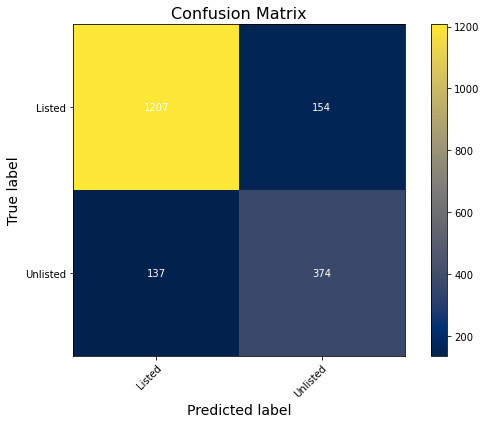

In [ ]:
labels = ["Listed", "Unlisted"]
cm = confusion_matrix(y_val_bow2, y_pred_lg_bow2)


# Plot the confusion matrix
plot_cm(cm, labels)

### 5.2.3.1 Logistic Regression with GloVe applied only to comments

In [ ]:
# Create a logistic regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train_glove['all_comments_cleaned_embedding'].tolist(), y_train_glove)

# Predict on the validation data
y_pred_lg_glove = logreg.predict(X_val_glove['all_comments_cleaned_embedding'].tolist())

# Print the classification report
print(classification_report(y_val_glove, y_pred_lg_glove))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      1361
           1       0.70      0.84      0.77       511

    accuracy                           0.86      1872
   macro avg       0.82      0.85      0.83      1872
weighted avg       0.87      0.86      0.86      1872



C:\Users\barbara\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


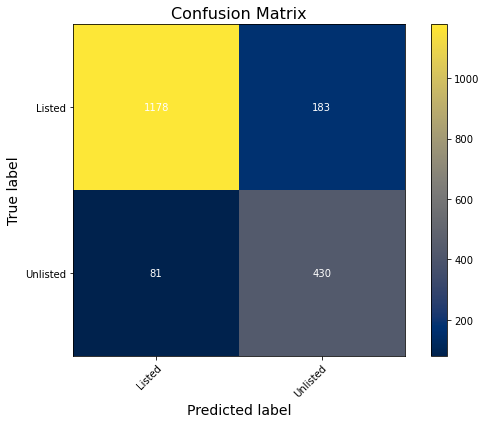

In [ ]:
# Example labels and confusion matrix
labels = ["Listed", "Unlisted"]
cm = confusion_matrix(y_val_glove, y_pred_lg_glove)

# Plot the confusion matrix
plot_cm(cm, labels)

### 5.2.3.2 Logistic Regression applied to merged comments and description

In [ ]:
# Create a logistic regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train_glove2['comments_and_description_cleaned_embedding'].tolist(), y_train_glove2)

# Predict on the validation data
y_pred_lg_glove2 = logreg.predict(X_val_glove2['comments_and_description_cleaned_embedding'].tolist())

# Print the classification report
print(classification_report(y_val_glove2, y_pred_lg_glove2))

C:\Users\barbara\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1361
           1       0.72      0.64      0.68       511

    accuracy                           0.83      1872
   macro avg       0.80      0.77      0.78      1872
weighted avg       0.83      0.83      0.83      1872



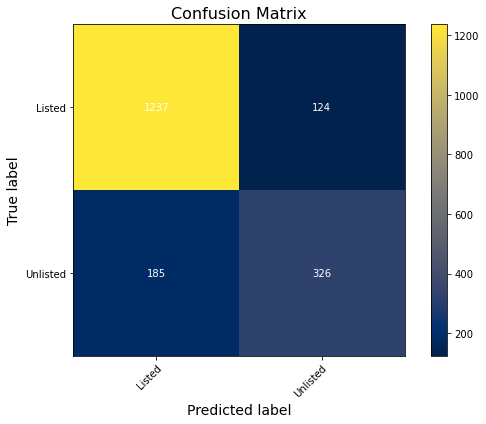

In [ ]:
# Example labels and confusion matrix
labels = ["Listed", "Unlisted"]
cm = confusion_matrix(y_val_glove2, y_pred_lg_glove2)

# Plot the confusion matrix
plot_cm(cm, labels)

#### 5.2.4.1 Logistic Regression with BERT applied to only comments

In [ ]:
# Create a logistic regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train_bert, y_train_bert)

# Predict on the validation data
y_pred_lg_bert = logreg.predict(X_val_bert)

# Print the classification report
print(classification_report(y_val_bert, y_pred_lg_bert))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      1361
           1       0.70      0.84      0.77       511

    accuracy                           0.86      1872
   macro avg       0.82      0.85      0.83      1872
weighted avg       0.87      0.86      0.86      1872



C:\Users\barbara\anaconda3\envs\Faculdade\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


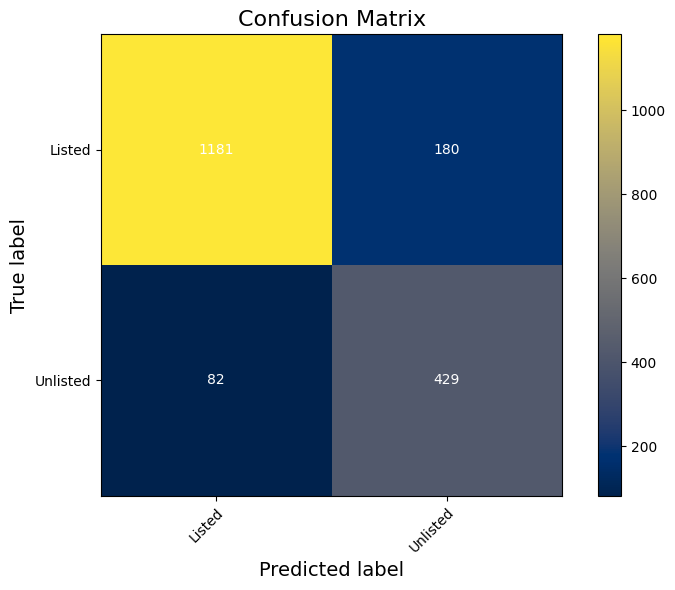

In [ ]:
# Example labels and confusion matrix
labels = ["Listed", "Unlisted"]
cm = confusion_matrix(y_val_bert, y_pred_lg_bert)

# Plot the confusion matrix
plot_cm(cm, labels)

#### 5.2.4.2 Logistic Regression with BERT applied to merged comments and descriptions

In [ ]:
# Create a logistic regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train_bert2, y_train_bert2)

# Predict on the validation data
y_pred_lg_bert2 = logreg.predict(X_val_bert2)

# Print the classification report
print(classification_report(y_val_bert2, y_pred_lg_bert2))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1361
           1       0.71      0.74      0.72       511

    accuracy                           0.85      1872
   macro avg       0.81      0.81      0.81      1872
weighted avg       0.85      0.85      0.85      1872



C:\Users\barbara\anaconda3\envs\Faculdade\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


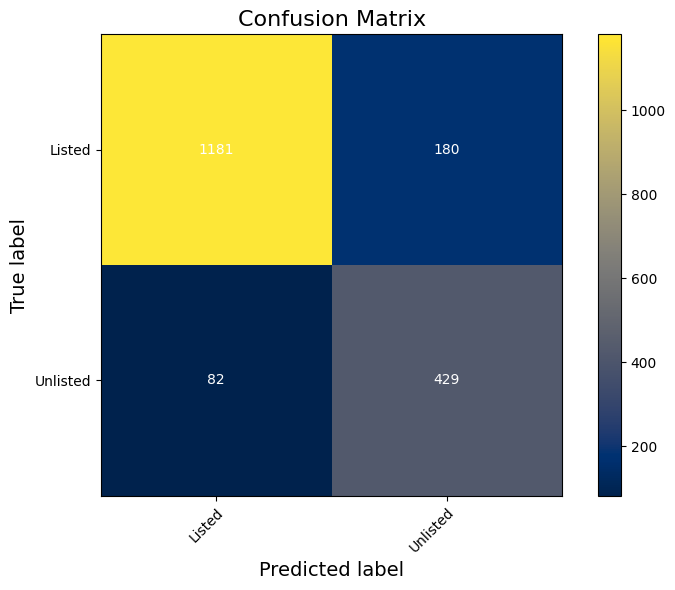

In [ ]:
# Example labels and confusion matrix
labels = ["Listed", "Unlisted"]
cm = confusion_matrix(y_val_bert, y_pred_lg_bert)

# Plot the confusion matrix
plot_cm(cm, labels)

### 5.3 Naive Bayes</font><div id="nb"></div>

Multinomial Naive Bayes (MultinomialNB)
Assumptions: MultinomialNB assumes that the features follow a multinomial distribution. This is particularly suited for discrete count data, such as word counts in text classification problems.
Usage: Commonly used in text classification tasks where features are typically represented as term frequencies or TF-IDF values. The model works well with non-negative features.
Feature Handling: MultinomialNB expects non-negative feature values (e.g., word counts or TF-IDF scores) and can handle sparse matrices directly.
Mathematical Formulation: The likelihood of the features is calculated using the multinomial distribution, which is suitable for counts of discrete events.

### 5.3.1.1 Naive Bayes with TF-IDF applied only to comments

In [ ]:
# Create a Naive Bayes model
nb = MultinomialNB()

# Fit the model on the training data
nb.fit(X_train_tfidf, y_train_tfidf)

# Predict on the validation data
y_pred_nb_tfidf = nb.predict(X_val_tfidf)

# Print the classification report
print(classification_report(y_val_tfidf, y_pred_nb_tfidf))


C:\Users\barbara\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0       0.94      0.87      0.90      1361
           1       0.70      0.84      0.77       511

    accuracy                           0.86      1872
   macro avg       0.82      0.85      0.83      1872
weighted avg       0.87      0.86      0.86      1872



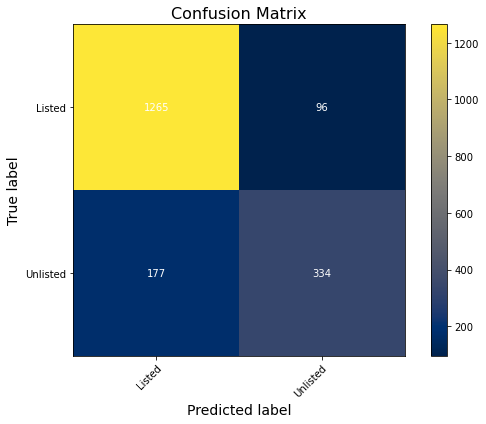

In [ ]:
# Example labels and confusion matrix
labels = ["Listed", "Unlisted"]
cm = confusion_matrix(y_val_tfidf, y_pred_lg_tfidf)

# Plot the confusion matrix
plot_cm(cm, labels)

### 5.3.1.2 Naive Bayes with TF-IDF applied to merged comments and description

In [ ]:
# Create a Naive Bayes model
nb = MultinomialNB()

# Fit the model on the training data
nb.fit(X_train_tfidf2, y_train_tfidf2)

# Predict on the validation data
y_pred_nb_tfidf2 = nb.predict(X_val_tfidf2)

# Print the classification report
print(classification_report(y_val_tfidf2, y_pred_nb_tfidf2))

C:\Users\barbara\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1361
           1       0.88      0.08      0.15       511

    accuracy                           0.75      1872
   macro avg       0.81      0.54      0.50      1872
weighted avg       0.78      0.75      0.66      1872



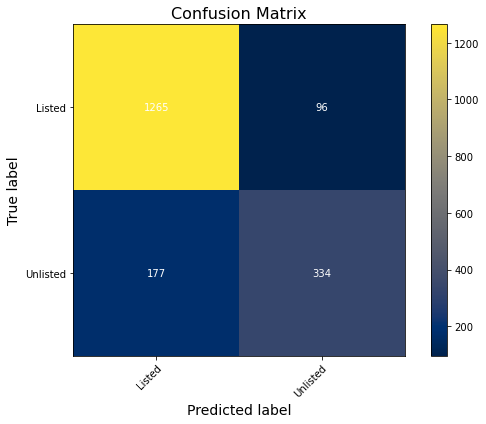

In [ ]:
# Example labels and confusion matrix
labels = ["Listed", "Unlisted"]
cm = confusion_matrix(y_val_tfidf2, y_pred_lg_tfidf2)

# Plot the confusion matrix
plot_cm(cm, labels)

### 5.3.2.1 Naive Bayes with BoW applied only to comments

In [ ]:
# Create a Naive Bayes model
nb = MultinomialNB()

# Fit the model on the training data
nb.fit(X_train_bow, y_train_bow)

# Predict on the validation data
y_pred_nb_bow = nb.predict(X_val_bow)

# Print the classification report
print(classification_report(y_val_bow, y_pred_nb_bow))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1361
           1       0.69      0.85      0.76       511

    accuracy                           0.85      1872
   macro avg       0.81      0.85      0.83      1872
weighted avg       0.87      0.85      0.86      1872



C:\Users\barbara\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


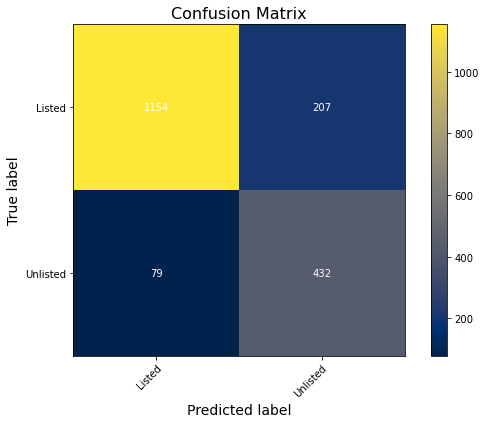

In [ ]:
# Example labels and confusion matrix
labels = ["Listed", "Unlisted"]
cm = confusion_matrix(y_val_bow, y_pred_lg_bow)

# Plot the confusion matrix
plot_cm(cm, labels)

### 5.3.2.2 Naive Bayes with BoW applied to merged comments and description

In [ ]:
# Create a Naive Bayes model
nb = MultinomialNB()

# Fit the model on the training data
nb.fit(X_train_bow2, y_train_bow2)

# Predict on the validation data
y_pred_nb_bow2 = nb.predict(X_val_bow2)

# Print the classification report
print(classification_report(y_val_bow2, y_pred_nb_bow2))

              precision    recall  f1-score   support

           0       0.93      0.79      0.86      1361
           1       0.61      0.85      0.71       511

    accuracy                           0.81      1872
   macro avg       0.77      0.82      0.78      1872
weighted avg       0.84      0.81      0.82      1872



C:\Users\barbara\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


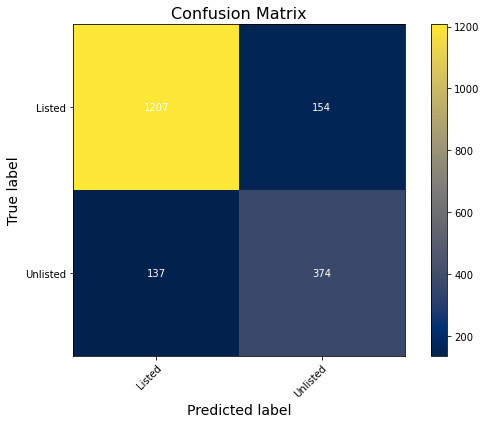

In [ ]:
# Example labels and confusion matrix
labels = ["Listed", "Unlisted"]
cm = confusion_matrix(y_val_bow2, y_pred_lg_bow2)

# Plot the confusion matrix
plot_cm(cm, labels)

### 5.3.3.1 Naive Bayes with GloVe applied only to comments

In [ ]:
# Create a Naive Bayes model
nb = GaussianNB()

# Fit the model on the training data
nb.fit(X_train_glove['all_comments_cleaned_embedding'].tolist(), y_train_glove)

# Predict on the validation data
y_pred_nb_glove = nb.predict(X_val_glove['all_comments_cleaned_embedding'].tolist())

# Print the classification report
print(classification_report(y_val_glove, y_pred_nb_glove))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      1361
           1       0.70      0.84      0.77       511

    accuracy                           0.86      1872
   macro avg       0.82      0.85      0.83      1872
weighted avg       0.87      0.86      0.86      1872



C:\Users\barbara\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


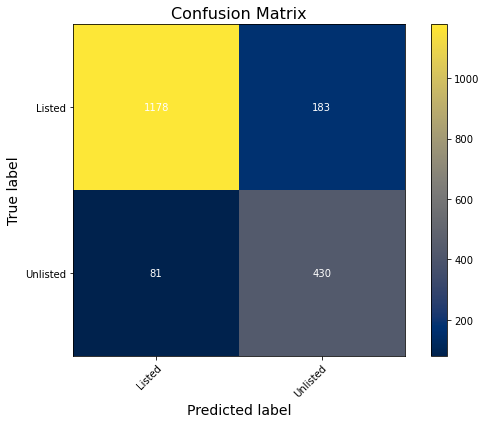

In [ ]:
# Example labels and confusion matrix
labels = ["Listed", "Unlisted"]
cm = confusion_matrix(y_val_glove, y_pred_nb_glove)

# Plot the confusion matrix
plot_cm(cm, labels)

### 5.3.3.2 Naive Bayes with GloVe applied to merged comments and description

In [ ]:
# Create a Naive Bayes model
nb = GaussianNB()

# Fit the model on the training data
nb.fit(X_train_glove2['comments_and_description_cleaned_embedding'].tolist(), y_train_glove2)

# Predict on the validation data
y_pred_nb_glove2 = nb.predict(X_val_glove2['comments_and_description_cleaned_embedding'].tolist())

# Print the classification report
print(classification_report(y_val_glove2, y_pred_nb_glove2))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87      1361
           1       0.62      0.84      0.71       511

    accuracy                           0.82      1872
   macro avg       0.78      0.82      0.79      1872
weighted avg       0.85      0.82      0.82      1872



C:\Users\barbara\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


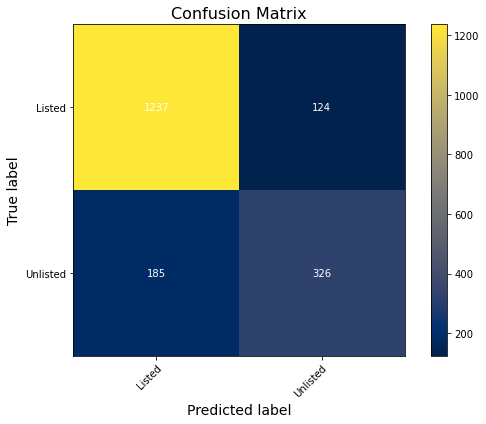

In [ ]:
# Example labels and confusion matrix
labels = ["Listed", "Unlisted"]
cm = confusion_matrix(y_val_glove2, y_pred_nb_glove2)

# Plot the confusion matrix
plot_cm(cm, labels)

#### 5.3.4.1 Naive Bayes with BERT applied to only comments

In [ ]:
# Create a Naive Bayes model
nb = GaussianNB()

# Fit the model on the training data
nb.fit(X_train_bert, y_train_bert)

# Predict on the validation data
y_pred_nb_bert = nb.predict(X_val_bert)

# Print the classification report
print(classification_report(y_val_bert, y_pred_nb_bert))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      1361
           1       0.70      0.84      0.77       511

    accuracy                           0.86      1872
   macro avg       0.82      0.85      0.83      1872
weighted avg       0.87      0.86      0.86      1872



C:\Users\barbara\anaconda3\envs\Faculdade\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


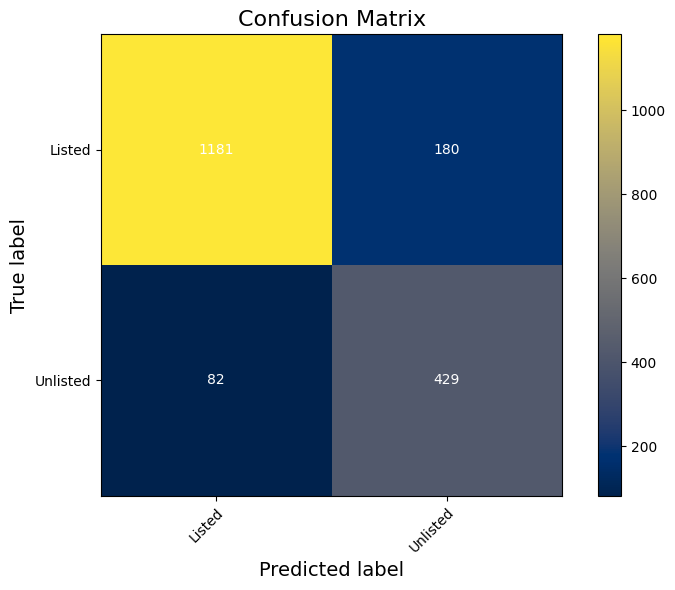

In [ ]:
# Example labels and confusion matrix
labels = ["Listed", "Unlisted"]
cm = confusion_matrix(y_val_bert, y_pred_nb_bert)

# Plot the confusion matrix
plot_cm(cm, labels)

#### 5.3.4.2 Naive bayes with BERT aplied to merged comments and description

In [ ]:
# Create a Naive Bayes model
nb = GaussianNB()

# Fit the model on the training data
nb.fit(X_train_bert2, y_train_bert2)

# Predict on the validation data
y_pred_nb_bert2 = nb.predict(X_val_bert2)

# Print the classification report
print(classification_report(y_val_bert2, y_pred_nb_bert2))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87      1361
           1       0.62      0.83      0.71       511

    accuracy                           0.82      1872
   macro avg       0.78      0.82      0.79      1872
weighted avg       0.85      0.82      0.82      1872



C:\Users\barbara\anaconda3\envs\Faculdade\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


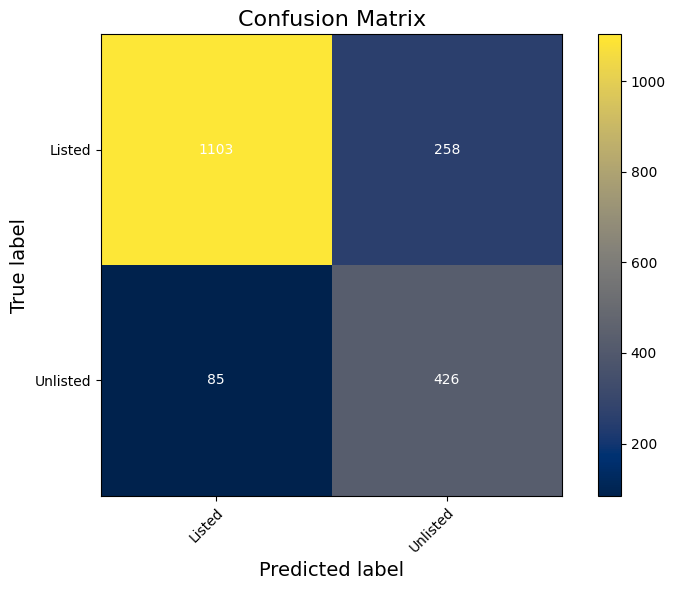

In [ ]:
# Example labels and confusion matrix
labels = ["Listed", "Unlisted"]
cm = confusion_matrix(y_val_bert2, y_pred_nb_bert2)

# Plot the confusion matrix
plot_cm(cm, labels)

### 5.4 Advanced Modelling: Transformers</font><div id="transformers"></div>

In [8]:
X_train_bert = X_train.copy()
y_train_bert = y_train.copy()
X_val_bert = X_val.copy()
y_val_bert = y_val.copy()

In [9]:
X_train_bert['comments_and_description_cleaned'] = X_train_bert.apply(lambda row: row['all_comments_cleaned'] + ' ' + row['cleaned_description'], axis=1)
X_val_bert['comments_and_description_cleaned'] = X_val_bert.apply(lambda row: row['all_comments_cleaned'] + ' ' + row['cleaned_description'], axis=1)

In [10]:
# Convert string labels to integers
y_train_bert['unlisted'] = y_train_bert['unlisted'].astype(int)
y_val_bert['unlisted'] = y_val_bert['unlisted'].astype(int)

In [11]:
train_labels = y_train_bert.values
val_labels = y_val_bert.values

In [16]:
# Define device (GPU if available, otherwise CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize BERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-uncased")

# Tokenize and encode text data for X_train
train_encodings = tokenizer(list(X_train_bert['comments_and_description_cleaned']), truncation=True, padding=True, return_tensors='pt')

# Tokenize and encode text data for X_val
val_encodings = tokenizer(list(X_val_bert['comments_and_description_cleaned']), truncation=True, padding=True, return_tensors='pt')

# Convert numpy arrays to PyTorch tensors
train_labels = torch.tensor(train_labels)
val_labels = torch.tensor(val_labels)

# Create TensorDatasets
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], train_labels)
val_dataset = TensorDataset(val_encodings['input_ids'], val_encodings['attention_mask'], val_labels)

# Define batch size
batch_size = 8

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Initialize BERT model for sequence classification
model = AutoModelForSequenceClassification.from_pretrained("bert-base-multilingual-uncased", num_labels=2).to(device)

# Define optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

# Define loss function
loss_fn = torch.nn.CrossEntropyLoss()

# Define number of epochs
num_epochs = 3

# Training loop
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    total_correct = 0
    total_samples = 0
    predictions_train = []
    true_labels_train = []
    for batch in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', leave=False):
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        _, predicted = torch.max(outputs.logits, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)
        predictions_train.extend(predicted.cpu().tolist())
        true_labels_train.extend(labels.cpu().tolist())
        loss.backward()
        optimizer.step()
    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = accuracy_score(true_labels_train, predictions_train)
    train_f1 = f1_score(true_labels_train, predictions_train, average='weighted')
    train_recall = recall_score(true_labels_train, predictions_train, average='weighted')
    train_precision = precision_score(true_labels_train, predictions_train, average='weighted')
    print(f'Epoch {epoch+1}/{num_epochs}, Average Training Loss: {avg_train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}, Training F1: {train_f1:.4f}, Training Recall: {train_recall:.4f}, Training Precision: {train_precision:.4f}')

    # Validation
    model.eval()
    total_correct = 0
    total_samples = 0
    total_val_loss = 0
    predictions_val = []
    true_labels_val = []
    with torch.no_grad():
        for batch in val_loader:
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_val_loss += loss.item()
            _, predicted = torch.max(outputs.logits, 1)
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)
            predictions_val.extend(predicted.cpu().tolist())
            true_labels_val.extend(labels.cpu().tolist())
    avg_val_loss = total_val_loss / len(val_loader)
    val_accuracy = accuracy_score(true_labels_val, predictions_val)
    val_f1 = f1_score(true_labels_val, predictions_val, average='weighted')
    val_recall = recall_score(true_labels_val, predictions_val, average='weighted')
    val_precision = precision_score(true_labels_val, predictions_val, average='weighted')
    print(f'Epoch {epoch+1}/{num_epochs}, Average Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}, Validation F1: {val_f1:.4f}, Validation Recall: {val_recall:.4f}, Validation Precision: {val_precision:.4f}')

# Print confusion matrix for validation set
print("Validation Confusion Matrix:")
print(confusion_matrix(true_labels_val, predictions_val))

model.safetensors:   0%|          | 0.00/672M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/3, Average Training Loss: 0.3806, Training Accuracy: 0.8381, Training F1: 0.8426, Training Recall: 0.8381, Training Precision: 0.8533
Epoch 1/3, Average Validation Loss: 0.3908, Validation Accuracy: 0.8237, Validation F1: 0.8309, Validation Recall: 0.8237, Validation Precision: 0.8553


Epoch 2/3, Average Training Loss: 0.3684, Training Accuracy: 0.8479, Training F1: 0.8518, Training Recall: 0.8479, Training Precision: 0.8607
Epoch 2/3, Average Validation Loss: 0.3696, Validation Accuracy: 0.8440, Validation F1: 0.8493, Validation Recall: 0.8440, Validation Precision: 0.8649


Epoch 3/3, Average Training Loss: 0.3528, Training Accuracy: 0.8639, Training F1: 0.8667, Training Recall: 0.8639, Training Precision: 0.8725
Epoch 3/3, Average Validation Loss: 0.3456, Validation Accuracy: 0.8670, Validation F1: 0.8701, Validation Recall: 0.8670, Validation Precision: 0.8777
Validation Confusion Matrix:
[[1191  170]
 [  79  432]]


In [13]:
# Define device (GPU if available, otherwise CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize BERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-uncased")

# Tokenize and encode text data for X_train
train_encodings = tokenizer(list(X_train_bert['all_comments_cleaned']), truncation=True, padding=True, return_tensors='pt')

# Tokenize and encode text data for X_val
val_encodings = tokenizer(list(X_val_bert['all_comments_cleaned']), truncation=True, padding=True, return_tensors='pt')

# Convert numpy arrays to PyTorch tensors
train_labels = torch.tensor(train_labels)
val_labels = torch.tensor(val_labels)

# Create TensorDatasets
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], train_labels)
val_dataset = TensorDataset(val_encodings['input_ids'], val_encodings['attention_mask'], val_labels)

# Define batch size
batch_size = 8

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Initialize BERT model for sequence classification
model = AutoModelForSequenceClassification.from_pretrained("bert-base-multilingual-uncased", num_labels=2).to(device)

# Define optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

# Define loss function
loss_fn = torch.nn.CrossEntropyLoss()

# Define number of epochs
num_epochs = 3

# Training loop
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    total_correct = 0
    total_samples = 0
    predictions_train = []
    true_labels_train = []
    for batch in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', leave=False):
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        _, predicted = torch.max(outputs.logits, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)
        predictions_train.extend(predicted.cpu().tolist())
        true_labels_train.extend(labels.cpu().tolist())
        loss.backward()
        optimizer.step()
    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = accuracy_score(true_labels_train, predictions_train)
    train_f1 = f1_score(true_labels_train, predictions_train, average='weighted')
    train_recall = recall_score(true_labels_train, predictions_train, average='weighted')
    train_precision = precision_score(true_labels_train, predictions_train, average='weighted')
    print(f'Epoch {epoch+1}/{num_epochs}, Average Training Loss: {avg_train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}, Training F1: {train_f1:.4f}, Training Recall: {train_recall:.4f}, Training Precision: {train_precision:.4f}')

    # Validation
    model.eval()
    total_correct = 0
    total_samples = 0
    total_val_loss = 0
    predictions_val = []
    true_labels_val = []
    with torch.no_grad():
        for batch in val_loader:
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_val_loss += loss.item()
            _, predicted = torch.max(outputs.logits, 1)
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)
            predictions_val.extend(predicted.cpu().tolist())
            true_labels_val.extend(labels.cpu().tolist())
    avg_val_loss = total_val_loss / len(val_loader)
    val_accuracy = accuracy_score(true_labels_val, predictions_val)
    val_f1 = f1_score(true_labels_val, predictions_val, average='weighted')
    val_recall = recall_score(true_labels_val, predictions_val, average='weighted')
    val_precision = precision_score(true_labels_val, predictions_val, average='weighted')
    print(f'Epoch {epoch+1}/{num_epochs}, Average Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}, Validation F1: {val_f1:.4f}, Validation Recall: {val_recall:.4f}, Validation Precision: {val_precision:.4f}')

# Print confusion matrix for validation set
print("Validation Confusion Matrix:")
print(confusion_matrix(true_labels_val, predictions_val))

model.safetensors:   0%|          | 0.00/672M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/3, Average Training Loss: 0.3587, Training Accuracy: 0.8617, Training F1: 0.8639, Training Recall: 0.8617, Training Precision: 0.8679
Epoch 1/3, Average Validation Loss: 0.3604, Validation Accuracy: 0.8600, Validation F1: 0.8636, Validation Recall: 0.8600, Validation Precision: 0.8721


Epoch 2/3, Average Training Loss: 0.3487, Training Accuracy: 0.8701, Training F1: 0.8731, Training Recall: 0.8701, Training Precision: 0.8800
Epoch 2/3, Average Validation Loss: 0.3556, Validation Accuracy: 0.8600, Validation F1: 0.8636, Validation Recall: 0.8600, Validation Precision: 0.8721


Epoch 3/3, Average Training Loss: 0.3482, Training Accuracy: 0.8704, Training F1: 0.8733, Training Recall: 0.8704, Training Precision: 0.8801
Epoch 3/3, Average Validation Loss: 0.3676, Validation Accuracy: 0.8600, Validation F1: 0.8636, Validation Recall: 0.8600, Validation Precision: 0.8721
Validation Confusion Matrix:
[[1181  180]
 [  82  429]]


In [18]:
X_train_distilbert = X_train.copy()
y_train_distilbert = y_train.copy()
X_val_distilbert = X_val.copy()
y_val_distilbert = y_val.copy()

In [19]:
# Convert string labels to integers
y_train_distilbert['unlisted'] = y_train_distilbert['unlisted'].astype(int)
y_val_distilbert['unlisted']= y_val_distilbert['unlisted'].astype(int)

In [20]:
train_labels = y_train_distilbert.values
val_labels = y_val_distilbert.values

In [21]:
X_train_distilbert['comments_and_description_cleaned'] = X_train_distilbert.apply(lambda row: row['all_comments_cleaned'] + ' ' + row['cleaned_description'], axis=1)
X_val_distilbert['comments_and_description_cleaned'] = X_val_distilbert.apply(lambda row: row['all_comments_cleaned'] + ' ' + row['cleaned_description'], axis=1)

In [22]:
# Define device (GPU if available, otherwise CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize DistilBERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-multilingual-cased")

# Tokenize and encode text data for X_train
train_encodings = tokenizer(list(X_train_distilbert['comments_and_description_cleaned']), truncation=True, padding=True, return_tensors='pt')

# Tokenize and encode text data for X_val
val_encodings = tokenizer(list(X_val_distilbert['comments_and_description_cleaned']), truncation=True, padding=True, return_tensors='pt')

# Convert numpy arrays to PyTorch tensors
train_labels = torch.tensor(train_labels)
val_labels = torch.tensor(val_labels)

# Create TensorDatasets
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], train_labels)
val_dataset = TensorDataset(val_encodings['input_ids'], val_encodings['attention_mask'], val_labels)

# Define batch size
batch_size = 8

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Initialize DistilBERT model for sequence classification
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-multilingual-cased", num_labels=2).to(device)

# Define optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

# Define loss function
loss_fn = torch.nn.CrossEntropyLoss()

# Define number of epochs
num_epochs = 3

# Training loop
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    total_correct = 0
    total_samples = 0
    predictions_train = []
    true_labels_train = []
    for batch in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', leave=False):
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        _, predicted = torch.max(outputs.logits, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)
        predictions_train.extend(predicted.cpu().tolist())
        true_labels_train.extend(labels.cpu().tolist())
        loss.backward()
        optimizer.step()
    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = accuracy_score(true_labels_train, predictions_train)
    train_f1 = f1_score(true_labels_train, predictions_train, average='weighted')
    train_recall = recall_score(true_labels_train, predictions_train, average='weighted')
    train_precision = precision_score(true_labels_train, predictions_train, average='weighted')
    print(f'Epoch {epoch+1}/{num_epochs}, Average Training Loss: {avg_train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}, Training F1: {train_f1:.4f}, Training Recall: {train_recall:.4f}, Training Precision: {train_precision:.4f}')

    # Validation
    model.eval()
    total_correct = 0
    total_samples = 0
    total_val_loss = 0
    predictions_val = []
    true_labels_val = []
    with torch.no_grad():
        for batch in val_loader:
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_val_loss += loss.item()
            _, predicted = torch.max(outputs.logits, 1)
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)
            predictions_val.extend(predicted.cpu().tolist())
            true_labels_val.extend(labels.cpu().tolist())
    avg_val_loss = total_val_loss / len(val_loader)
    val_accuracy = accuracy_score(true_labels_val, predictions_val)
    val_f1 = f1_score(true_labels_val, predictions_val, average='weighted')
    val_recall = recall_score(true_labels_val, predictions_val, average='weighted')
    val_precision = precision_score(true_labels_val, predictions_val, average='weighted')
    print(f'Epoch {epoch+1}/{num_epochs}, Average Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}, Validation F1: {val_f1:.4f}, Validation Recall: {val_recall:.4f}, Validation Precision: {val_precision:.4f}')

# Print confusion matrix for validation set
print("Validation Confusion Matrix:")
print(confusion_matrix(true_labels_val, predictions_val))


model.safetensors:   0%|          | 0.00/542M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/3, Average Training Loss: 0.3678, Training Accuracy: 0.8495, Training F1: 0.8515, Training Recall: 0.8495, Training Precision: 0.8545
Epoch 1/3, Average Validation Loss: 0.3434, Validation Accuracy: 0.8707, Validation F1: 0.8734, Validation Recall: 0.8707, Validation Precision: 0.8794


Epoch 2/3, Average Training Loss: 0.3376, Training Accuracy: 0.8736, Training F1: 0.8761, Training Recall: 0.8736, Training Precision: 0.8816
Epoch 2/3, Average Validation Loss: 0.3483, Validation Accuracy: 0.8718, Validation F1: 0.8745, Validation Recall: 0.8718, Validation Precision: 0.8807


Epoch 3/3, Average Training Loss: 0.3282, Training Accuracy: 0.8809, Training F1: 0.8827, Training Recall: 0.8809, Training Precision: 0.8862
Epoch 3/3, Average Validation Loss: 0.3418, Validation Accuracy: 0.8766, Validation F1: 0.8788, Validation Recall: 0.8766, Validation Precision: 0.8833
Validation Confusion Matrix:
[[1213  148]
 [  83  428]]


In [23]:
# Define device (GPU if available, otherwise CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize DistilBERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-multilingual-cased")

# Tokenize and encode text data for X_train
train_encodings = tokenizer(list(X_train_distilbert['all_comments_cleaned']), truncation=True, padding=True, return_tensors='pt')

# Tokenize and encode text data for X_val
val_encodings = tokenizer(list(X_val_distilbert['all_comments_cleaned']), truncation=True, padding=True, return_tensors='pt')

# Convert numpy arrays to PyTorch tensors
train_labels = torch.tensor(train_labels)
val_labels = torch.tensor(val_labels)

# Create TensorDatasets
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], train_labels)
val_dataset = TensorDataset(val_encodings['input_ids'], val_encodings['attention_mask'], val_labels)

# Define batch size
batch_size = 8

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Initialize DistilBERT model for sequence classification
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-multilingual-cased", num_labels=2).to(device)

# Define optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

# Define loss function
loss_fn = torch.nn.CrossEntropyLoss()

# Define number of epochs
num_epochs = 3

# Training loop
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    total_correct = 0
    total_samples = 0
    predictions_train = []
    true_labels_train = []
    for batch in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', leave=False):
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        _, predicted = torch.max(outputs.logits, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)
        predictions_train.extend(predicted.cpu().tolist())
        true_labels_train.extend(labels.cpu().tolist())
        loss.backward()
        optimizer.step()
    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = accuracy_score(true_labels_train, predictions_train)
    train_f1 = f1_score(true_labels_train, predictions_train, average='weighted')
    train_recall = recall_score(true_labels_train, predictions_train, average='weighted')
    train_precision = precision_score(true_labels_train, predictions_train, average='weighted')
    print(f'Epoch {epoch+1}/{num_epochs}, Average Training Loss: {avg_train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}, Training F1: {train_f1:.4f}, Training Recall: {train_recall:.4f}, Training Precision: {train_precision:.4f}')

    # Validation
    model.eval()
    total_correct = 0
    total_samples = 0
    total_val_loss = 0
    predictions_val = []
    true_labels_val = []
    with torch.no_grad():
        for batch in val_loader:
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_val_loss += loss.item()
            _, predicted = torch.max(outputs.logits, 1)
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)
            predictions_val.extend(predicted.cpu().tolist())
            true_labels_val.extend(labels.cpu().tolist())
    avg_val_loss = total_val_loss / len(val_loader)
    val_accuracy = accuracy_score(true_labels_val, predictions_val)
    val_f1 = f1_score(true_labels_val, predictions_val, average='weighted')
    val_recall = recall_score(true_labels_val, predictions_val, average='weighted')
    val_precision = precision_score(true_labels_val, predictions_val, average='weighted')
    print(f'Epoch {epoch+1}/{num_epochs}, Average Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}, Validation F1: {val_f1:.4f}, Validation Recall: {val_recall:.4f}, Validation Precision: {val_precision:.4f}')

# Print confusion matrix for validation set
print("Validation Confusion Matrix:")
print(confusion_matrix(true_labels_val, predictions_val))

<ipython-input-23-295e04fbc441>:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels = torch.tensor(train_labels)
<ipython-input-23-295e04fbc441>:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_labels = torch.tensor(val_labels)
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:521: FutureWarning:

Epoch 1/3, Average Training Loss: 0.3570, Training Accuracy: 0.8683, Training F1: 0.8710, Training Recall: 0.8683, Training Precision: 0.8769
Epoch 1/3, Average Validation Loss: 0.3673, Validation Accuracy: 0.8600, Validation F1: 0.8636, Validation Recall: 0.8600, Validation Precision: 0.8721


Epoch 2/3, Average Training Loss: 0.3469, Training Accuracy: 0.8706, Training F1: 0.8735, Training Recall: 0.8706, Training Precision: 0.8803
Epoch 2/3, Average Validation Loss: 0.3590, Validation Accuracy: 0.8600, Validation F1: 0.8636, Validation Recall: 0.8600, Validation Precision: 0.8721


Epoch 3/3, Average Training Loss: 0.3443, Training Accuracy: 0.8708, Training F1: 0.8737, Training Recall: 0.8708, Training Precision: 0.8805
Epoch 3/3, Average Validation Loss: 0.3564, Validation Accuracy: 0.8600, Validation F1: 0.8636, Validation Recall: 0.8600, Validation Precision: 0.8721
Validation Confusion Matrix:
[[1181  180]
 [  82  429]]


### 5.5 Model Selection and Hyperparameter Tuning</font><div id="modelselection"></div>

After evaluating all models with the various feature engineering techniques we employed, we found that six models yielded the same results. These models were:

- Logistic Regression with TF-IDF applied to only comments
- Logistic Regression with GloVe applied to only comments
- Logistic Regression with BERT applied to only comments
- Naive Bayes with TF-IDF applied to only comments 
- Naive Bayes with GloVe applied to only comments
- Naive Bayes with BERT applied to only comments

Given the identical performance across these models, we selected the first one we tried, which was Logistic Regression with TF-IDF. However, it's important to note that our choice was essentially arbitrary, as any of these models would have been equally valid.


**Now, we will perform a grid search to hopefully enhance the prediction accuracy.**

**it might be a good idea to try newton-cholesky on solver**

In [15]:
# Ignore warnings
warnings.filterwarnings("ignore")

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Algorithm to use in the optimization problem
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}

# Create a logistic regression model
logreg = LogisticRegression()

# Initialize GridSearchCV with logistic regression model, parameter grid, and scoring based on F1-score for class 1
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, scoring='f1', cv=5)

# Fit the model on the training data
grid_search.fit(X_train_tfidf, y_train_tfidf)

# Get the best estimator
best_logreg = grid_search.best_estimator_

# Predict on the validation data using the best estimator
y_pred_lg_tfidf = best_logreg.predict(X_val_tfidf)

# Print the best parameters
print(f"Best parameters found: {grid_search.best_params_}")

# Print the classification report
print(classification_report(y_val_tfidf, y_pred_lg_tfidf))

C:\Users\TCastilho\anaconda3\envs\TextMining\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\TCastilho\anaconda3\envs\TextMining\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\TCastilho\anaconda3\envs\TextMining\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\TCastilho\anaconda3\envs\TextMining\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was 

Best parameters found: {'C': 100, 'max_iter': 100, 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      1361
           1       0.70      0.84      0.77       511

    accuracy                           0.86      1872
   macro avg       0.82      0.85      0.83      1872
weighted avg       0.87      0.86      0.86      1872



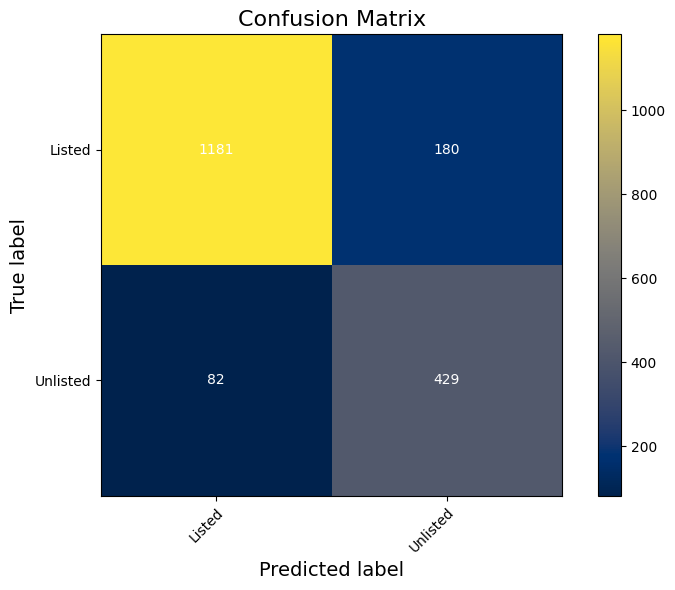

In [18]:
# Example labels and confusion matrix
labels = ["Listed", "Unlisted"]
cm = confusion_matrix(y_val_tfidf, y_pred_lg_tfidf)

# Plot the confusion matrix
plot_cm(cm, labels)

The grid search did not yield any significant improvement; however, we will proceed to utilize the supposed best parameters found:
Best parameters found: {'C': 100, 'max_iter': 100, 'solver': 'liblinear'}

## 6. Predicting Test Set</font><div id="testset"></div>

After an extensive process of model selection and hyperparameter tuning, we identified the best-performing model along with its optimal parameters. This model demonstrated superior predictive accuracy and robustness across various feature engineering techniques and dataset configurations. We then applied this best model to our test set to generate predictions for the target variable. The predictions were thoroughly validated to ensure they met the expected performance criteria. Finally, we exported these predictions to a CSV file named `Predictions_45.csv`, which included the test set IDs and their corresponding predicted labels. This file serves as the final output of our modelling efforts, encapsulating the culmination of our extensive model development and evaluation process.


**This was the model we used, now we will use the best parameters**

In [12]:
# Create a logistic regression model with specified parameters
logreg = LogisticRegression(C=100, max_iter=100, solver='liblinear')

# Fit the model on the training data
logreg.fit(X_train_tfidf, y_train_tfidf)

# Predict on the validation data
y_pred_lg_tfidf = logreg.predict(X_val_tfidf)

# Print the classification report
print(classification_report(y_val_tfidf, y_pred_lg_tfidf))


C:\Users\TCastilho\anaconda3\envs\TextMining\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.94      0.87      0.90      1361
           1       0.70      0.84      0.77       511

    accuracy                           0.86      1872
   macro avg       0.82      0.85      0.83      1872
weighted avg       0.87      0.86      0.86      1872



Applying TF-IDF to test set 
and fitting the best model

In [13]:
# Apply TF-IDF to the all_comments_cleaned in the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test["all_comments_cleaned"])

In [14]:
# Predict on the test data
y_pred_test = logreg.predict(X_test_tfidf)

In [15]:
# Create a DataFrame with the predictions and rename the index and column
predictions_df = pd.DataFrame({'predicted': y_pred_test}, index=X_test.index)
predictions_df.index.name = 'id'
predictions_df.columns = ['predicted']

# Export the DataFrame to a CSV file
predictions_df.to_csv('Predictions_45.csv')